### Preamble

In [1]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    // equality 
    
    def equalA(a1: A, a2: A): Boolean = 
        a1 == a2
    
    def equalB(b1: B, b2: B): Boolean =
        b1 == b2
    
    // Bijection laws
    
    def law1(a: A): Boolean = 
        equalA(to(from(a)), a)
    
    def law2(b: B): Boolean = 
        equalB(from(to(b)), b)
}

defined trait Isomorphic

# Topic 4. Curry-Howard correspondence

![haskell](../../images/haskellcurry.jpeg) Haskell Brooks Curry

![howard](../../images/howard-resize.jpg)Willian Howard

In this notebook we deal with another striking connection between functional programming and, in principle, a completely unrelated field of knowledge. When algebraic data types were introduced, we established a strong connection with _arithmetics_: now, it's the turn of _logic_. We will see that functional programming is akin, in a very close sense, to doing logic. That, when we write a type signature we are writing propositions that have to be proved; and that when we implement that signature, we are actually providing a proof of that proposition. Thus, this notebook resolves to show the following correspondences:

$$
\begin{array}{cc}
\mathrm{\bf Computation} & \mathrm{\bf Logic} \\
\hline 
\mathrm{Programs} & \mathrm{Proofs} \\
\mathrm{Types} & \mathrm{Propositions} 
\end{array}
$$

This correspondence between logic and computation is known as the Curry-Howard correspondence. It shows that programming functionally and following the laws of logic is the very same thing, ... and who on earth would want to program in a different way!

### References

[__The Curry-Howard correspondence__](https://en.wikipedia.org/wiki/Curry%E2%80%93Howard_correspondence) Wikpedia. 

[__Propositions as types__](https://homepages.inf.ed.ac.uk/wadler/papers/propositions-as-types/propositions-as-types.pdf). Philip Wadler. 

[__Intuitionistic logic__](https://en.wikipedia.org/wiki/Intuitionistic_logic). Wikipedia.

# A refresher: arithmetic and types

In [ ]:
val c0: Char = 'a'
val c1: Char = 'A'
val c2: Char = '@'
// ... 
// |Char| = 2^16 

val b0: Boolean = true
val b1: Boolean = false

In [ ]:
// |(Char, Boolean)|= 
val i: (Char, Boolean) = ??? : (Char, Boolean)


In [ ]:
// |(Char, Boolean)|= 
val i: (Char, Boolean) = (??? : Char, ??? : Boolean)


In [ ]:
// |(Char, Boolean)|= 
val t0: (Char, Boolean) = ('a' : Char, ??? : Boolean)
val t0: (Char, Boolean) = ('a' : Char, ??? : Boolean)
val t1: (Char, Boolean) = ('b' : Char, ??? : Boolean)
// 
val t2_16: (Char, Boolean) = ('Z': Char, ??? : Boolean)

In [ ]:
// |(Char, Boolean)|= |Char|*|Boolean| = 2^16*2 = 2^17
val t00: (Char, Boolean) = ('a' : Char, false : Boolean)
val t01: (Char, Boolean) = ('a' : Char, true : Boolean)
val t10: (Char, Boolean) = ('b' : Char, false : Boolean)
val t11: (Char, Boolean) = ('b' : Char, false : Boolean)
// 
val t2_16_0: (Char, Boolean) = ('Z': Char, false : Boolean)
val t2_16_1: (Char, Boolean) = ('Z': Char, true : Boolean)

|A|=n
|B|=m
|(A, B)|=|A|*|B|=n*m

In [ ]:
val s: Either[Char, Boolean] = ??? : Either[Char, Boolean]

In [3]:
lazy val s0: Either[Char, Boolean] = Left(??? : Char)
lazy val s1: Either[Char, Boolean] = Right(??? : Boolean)

s0: Either[Char, Boolean] = <lazy>
s1: Either[Char, Boolean] = <lazy>

In [3]:
// |Either[Char, Boolean]| = |Char|+|Boolean| = 2^16+2
lazy val s00: Either[Char, Boolean] = Left('a' : Char)
lazy val s01: Either[Char, Boolean] = Left('b' : Char)
// ... 
val s02_16: Either[Char, Boolean] = Left('Z': Char)

lazy val s10: Either[Char, Boolean] = Right(true : Boolean)
lazy val s11: Either[Char, Boolean] = Right(true : Boolean)

s0: Either[Char, Boolean] = <lazy>
s1: Either[Char, Boolean] = <lazy>

|Either[A, B]| = |A| + |B|

In [4]:
lazy val f: Boolean => Char = ???

f: Boolean => Char = <lazy>

In [5]:
// f: Boolean => Char
//      false -> ??? 
//      true  -> ??? 
lazy val f: Boolean => Char =
    (b: Boolean) => 
        if !b => ??? : Char
        else ??? : Char

f: Boolean => Char = <lazy>

In [6]:
// f: Boolean => Char
//      false -> ??? 
//      true  -> ??? 
lazy val f: Boolean => Char =
    (b: Boolean) => b match 
        case false => ??? : Char
        case true  => ??? : Char

f: Boolean => Char = <lazy>

In [7]:
// f: Boolean => Char
//      false -> ??? 
//      true  -> ??? 
lazy val f: Boolean => Char =
    case false => ??? : Char
    case true  => ??? : Char

f: Boolean => Char = <lazy>

In [7]:
// |Boolean => Char| = |Char|*|Char| = 2^16 * 2^16 = 2^32
// |(Char, Char)| = |Char|*|Char| = 2^32

// f: Boolean => Char
//      false -> ??? 
//      true  -> ??? 
lazy val f0_0: Boolean => Char =
    case false => 'a' : Char
    case true  => 'a' : Char

lazy val f1_0: Boolean => Char =
    case false => 'b' : Char
    case true  => 'a' : Char

// ... (2^16 posibilidades)
lazy val f2_16_0: Boolean => Char =
    case false => 'Z' : Char
    case true  => 'Z' : Char

lazy val f0_1: Boolean => Char =
    case false => 'a' : Char
    case true  => 'b' : Char

lazy val f1_1: Boolean => Char =
    case false => 'b' : Char
    case true  => 'b' : Char

// ... (2^16 posibilidades)
lazy val f2_16: Boolean => Char =
    case false => 'Z' : Char
    case true  => 'b' : Char

// .... 

f: Boolean => Char = <lazy>

In [8]:
lazy val f: Char => Boolean = ??? 

f: Char => Boolean = <lazy>

In [9]:
lazy val f: Char => Boolean = 
    case 'a' => ??? : Boolean
    case 'b' => ??? : Boolean
    // ...
    case 'Z' => ??? : Boolean

f: Char => Boolean = <lazy>

In [9]:
// |Char => Boolean| = |Boolean|*|Boolean|*....*|Boolean| = |Boolean|^|Char| = 2^(2^16)
//  type Char => Boolean = (Boolean, Boolean, ..., Boolean) 
lazy val f0: Char => Boolean = 
    case 'a' => false: Boolean
    case 'b' => true: Boolean
    // ...
    case 'Z' => ??? : Boolean

lazy val f1: Char => Boolean = 
    case 'a' => true: Boolean
    case 'b' => true : Boolean
    // ...
    case 'Z' => ??? : Boolean

lazy val f0: Char => Boolean = 
    case 'a' => false: Boolean
    case 'b' => false : Boolean
    // ...
    case 'Z' => ??? : Boolean

lazy val f1: Char => Boolean = 
    case 'a' => true: Boolean
    case 'b' => false : Boolean
    // ...
    case 'Z' => ??? : Boolean

// ... 

f: Char => Boolean = <lazy>

|A => B| = |B|*|B|*...*|B| = |B|^|A|

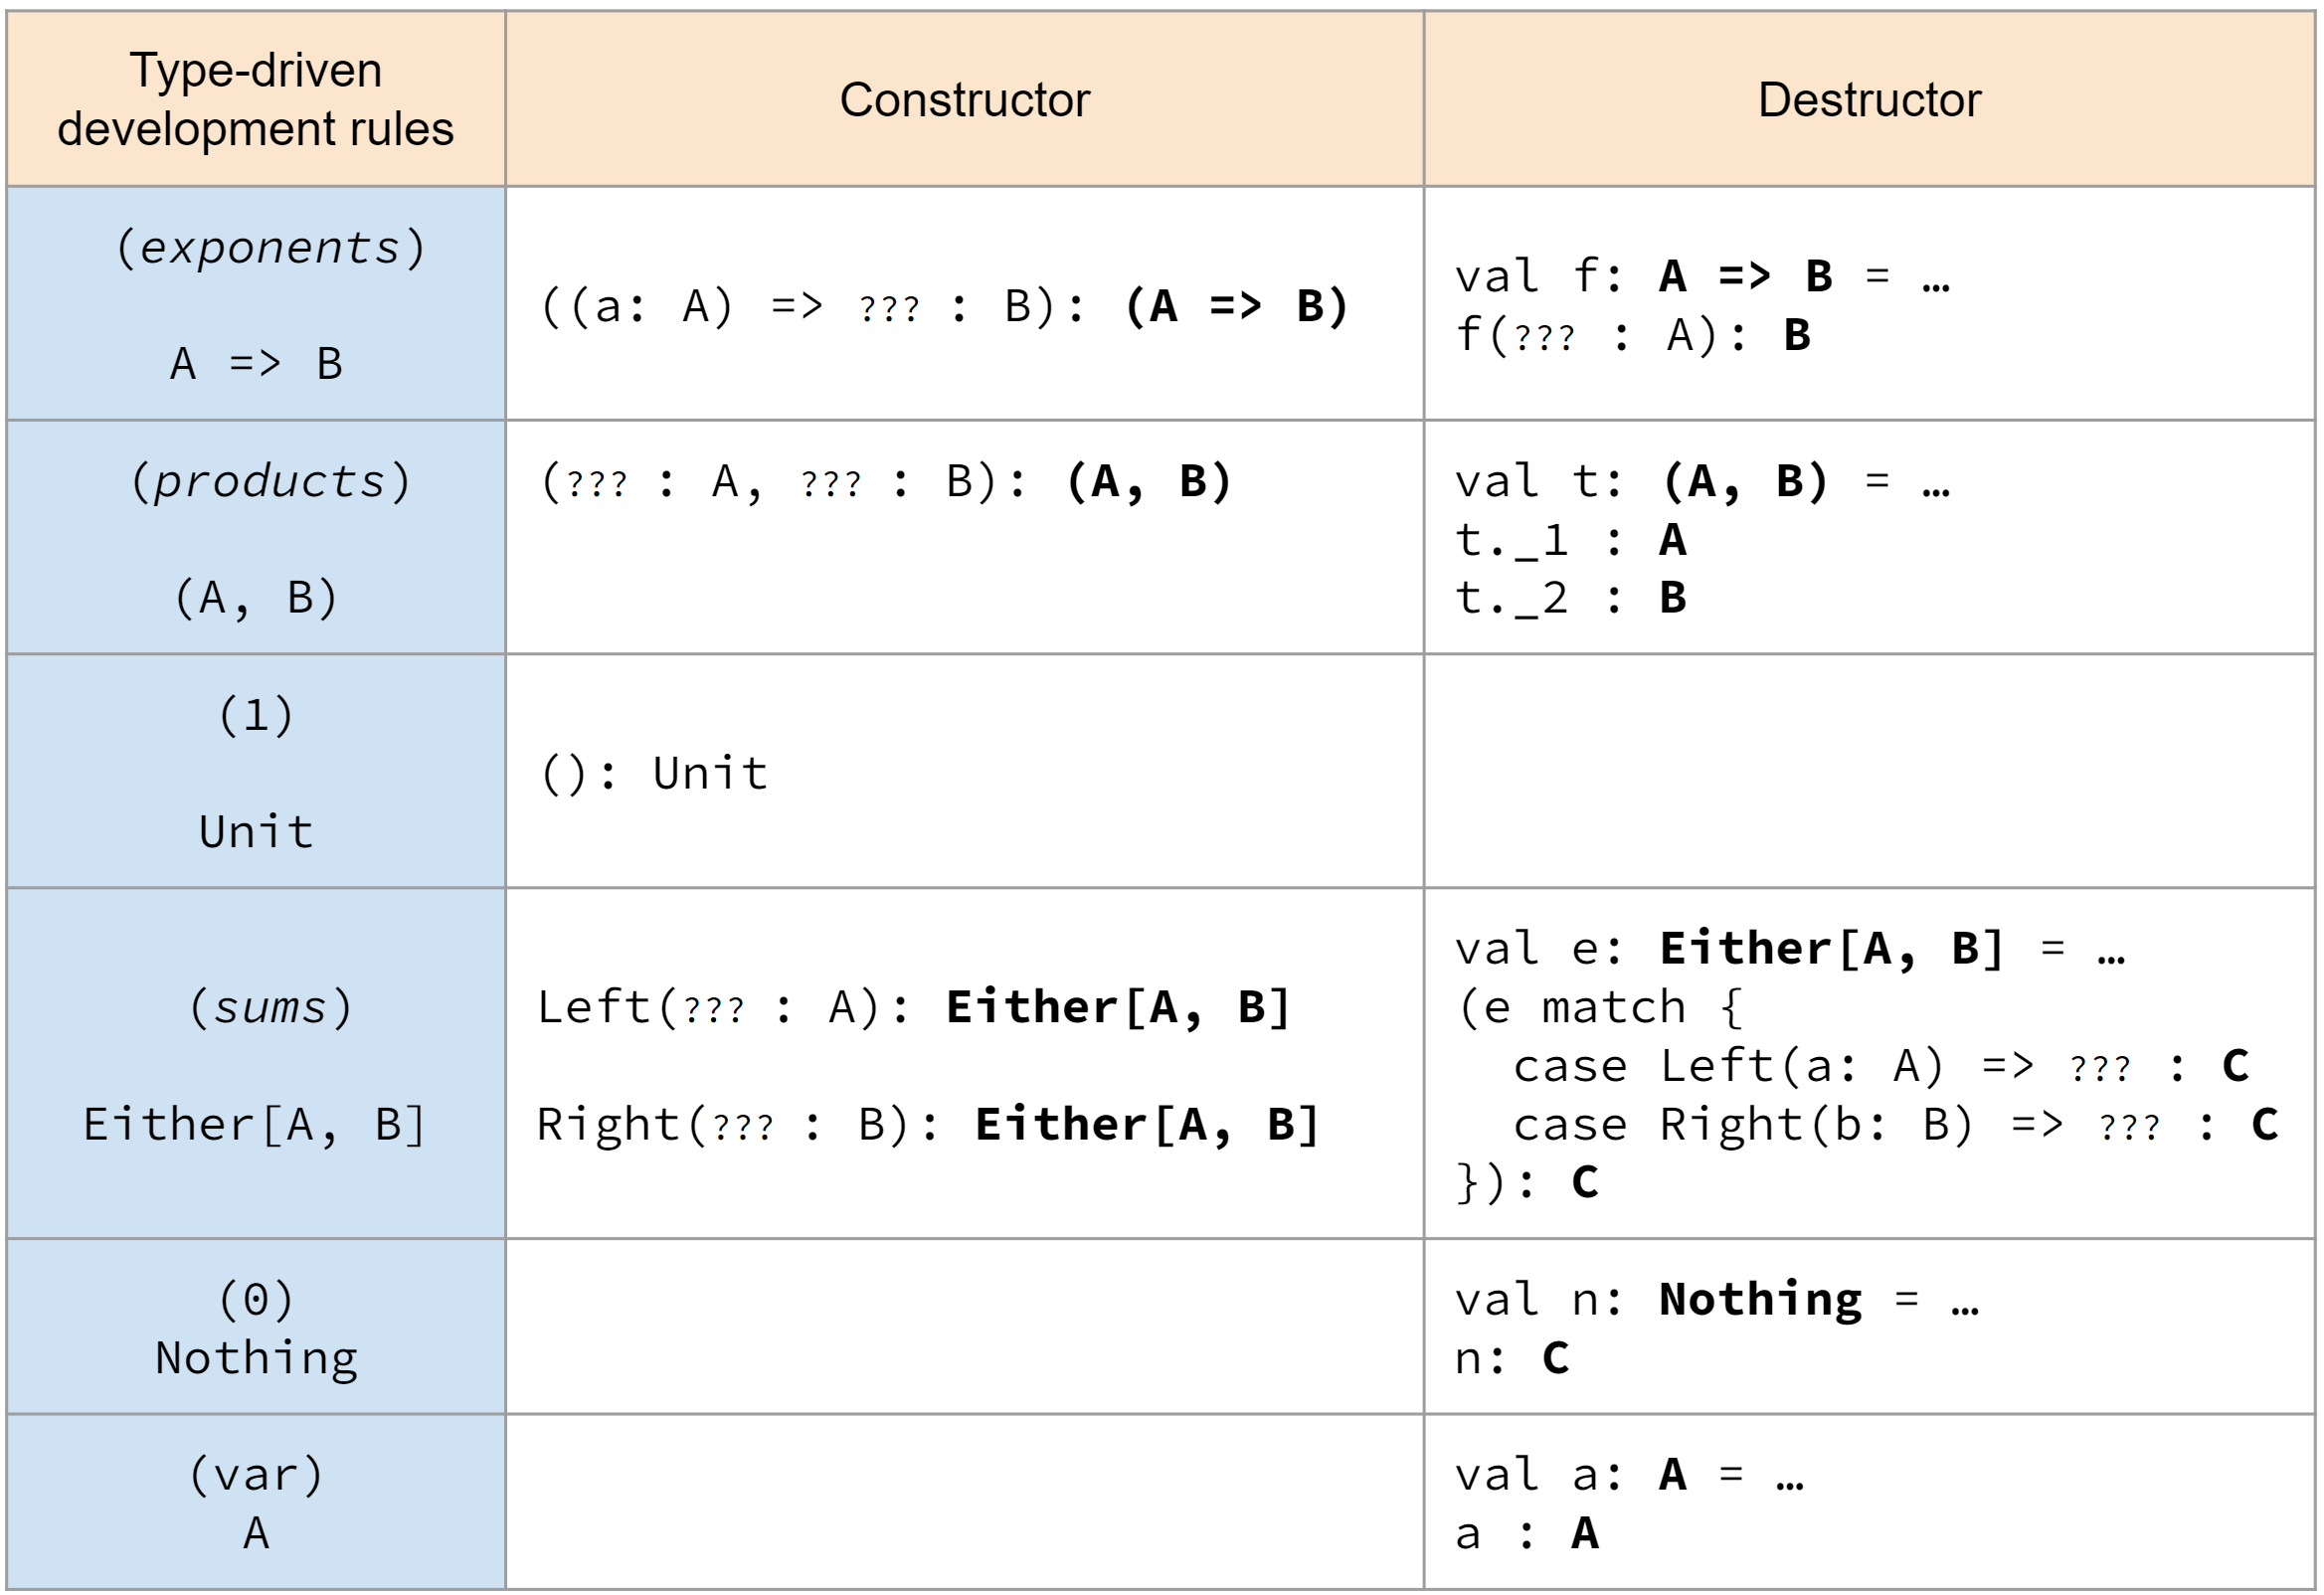

|(A, B)| = |A|*|B|

|(A, 1)| = |A|
|(1, A)| = |A|

|A|*|1| = |A|
|1| = |A|/|A|
|1| = 1


In [10]:
val u: Unit = ()

In [ ]:
def foo(a: Int): Unit = a match 
    case 0 => ??? : Unit
    case 1 => ??? : Unit
    // ... 
    

In [ ]:
def foo(a: Int): Unit = a match 
    case 0 => () : Unit
    case 1 => () : Unit
    // ... 
    

In [18]:
// |Int => Unit| = |Unit|*|Unit|* ... * |Unit| = 1*1*...*1 = 1^(2^32) = 1
def foo(a: Int): Unit = 
    println(a)
    ()
    

defined function foo

In [20]:
val u: Unit = foo(3)

3


In [21]:
u

In [13]:
// |Int => Unit| = |Unit|*|Unit|* ... * |Unit| = 1*1*...*1 = 1^(2^32) = 1
def foo(a: Int) = 
    println(a)
    

defined function foo

|Either[A, 0]| = |A|

|A|+|0| = |A|
|0| = |A| - |A|
|0| = 0


In [ ]:
val n: Nothing = ???

In [22]:
def foo(msg: String): Nothing = 
    throw new Exception(msg)

defined function foo

In [24]:
val n: Nothing = foo("hola")

java.lang.Exception: hola

In [15]:
def foo(n: Nothing): Int = 
    n

defined function foo

In [16]:
def foo(n: Nothing): Char = 
    n

defined function foo

In [24]:
def foo(a: Any): Char = 
    a


-- [E007] Type Mismatch Error: cmd25.sc:2:4 ------------------------------------
2 |    a
  |    ^
  |    Found:    (a : Any)
  |    Required: Char
  |
  | longer explanation available when compiling with `-explain`
Compilation Failed

In [17]:
val a: Any = 'a': Char
val a2: Any = true: Boolean

a: Any = 'a'
a2: Any = true

Recall the correspondence between algebraic data types and arithmetic operators: 

$$ 
\begin{array}{cc}
\mathrm{\bf Scala\ ADTs} & \mathrm{\bf Arithmetic} \\
\hline
\mathtt{Unit} & 1 \\
\mathtt{Nothing} & 0 \\
\mathtt{Either[X, Y]} & x + y \\
\mathtt{(X, Y)} & x * y \\
\mathtt{X => Y} & {y^x}  
\end{array}
$$

According to this algebraic interpretation of types, the type 

In [ ]:
type A = (Unit, Either[Unit, (Boolean => Either[Unit, Unit])])

has exactly `1*(1+(1+1)^2)` values. But not only that: corresponding to the equality `1*(1+(1+1)^2)=5`, the following isomorphism holds: 

In [3]:
lazy val iso: Isomorphic[
    (Unit, Either[Unit, (Boolean => Either[Unit, Unit])]),
    Either[Unit, Either[Unit, Either[Unit, Either[Unit, Unit]]]]] = ???

iso: Isomorphic[(Unit, Either[Unit, Boolean => Either[Unit, Unit]]), Either[Unit, Either[Unit, Either[Unit, Either[Unit, Unit]]]]] = <lazy>

# Propositions as types

We put forward now the following correspondence: 

$$ 
\begin{array}{cc}
\mathrm{\bf Scala\ ADTs} & \mathrm{\bf Logic} \\
\hline
\mathtt{Unit} & \top \\
\mathtt{Nothing} & \bot \\
\mathtt{Either[P, Q]} & p \vee q \\
\mathtt{(P, Q)} & p \wedge q \\
\mathtt{P => Q} & p \rightarrow q 
\end{array}
$$


?. (p -> q) ^ p -> q      ???

0. (p->q) ^ p             supuesto
...
0.? q
1. (p -> q) ^ p -> q      I->(0,0.?)   

0. (p->q) ^ p             supuesto
0.1 p->q                  E^(0)
0.2 p                     E^(0)
0.3 q                     E->(0.1, 0.2)
1. (p -> q) ^ p -> q      I->(0,0.3)                 

In [29]:
def proof[P, Q]: ((P => Q, P)) => Q = 
    ??? : (((P => Q, P)) => Q)

defined function proof

In [30]:
// Constructor (functions)
def proof[P, Q]: ((P => Q, P)) => Q = 
    (t: (P => Q, P)) => 
        ??? : Q

defined function proof

In [31]:
// Destructor (tuplas)
def proof[P, Q]: ((P => Q, P)) => Q = 
    (t: (P => Q, P)) => 
        val f: P => Q = t._1
        val p: P = t._2
        ??? : Q

defined function proof

In [32]:
// Destructor (functions)
def proof[P, Q]: ((P => Q, P)) => Q = 
    (t: (P => Q, P)) => 
        val f: P => Q = t._1
        val p: P = t._2
        f(??? : P) : Q

defined function proof

In [33]:
// Destructor (vars)
def proof[P, Q]: ((P => Q, P)) => Q = 
    (t: (P => Q, P)) => 
        val f: P => Q = t._1
        val p: P = t._2
        f(p : P) : Q

defined function proof

In [42]:
// Destructor (vars)
def proof[P, Q]: ((P => Q, P)) => Q = 
    case (f, p) => f(p)

defined function proof

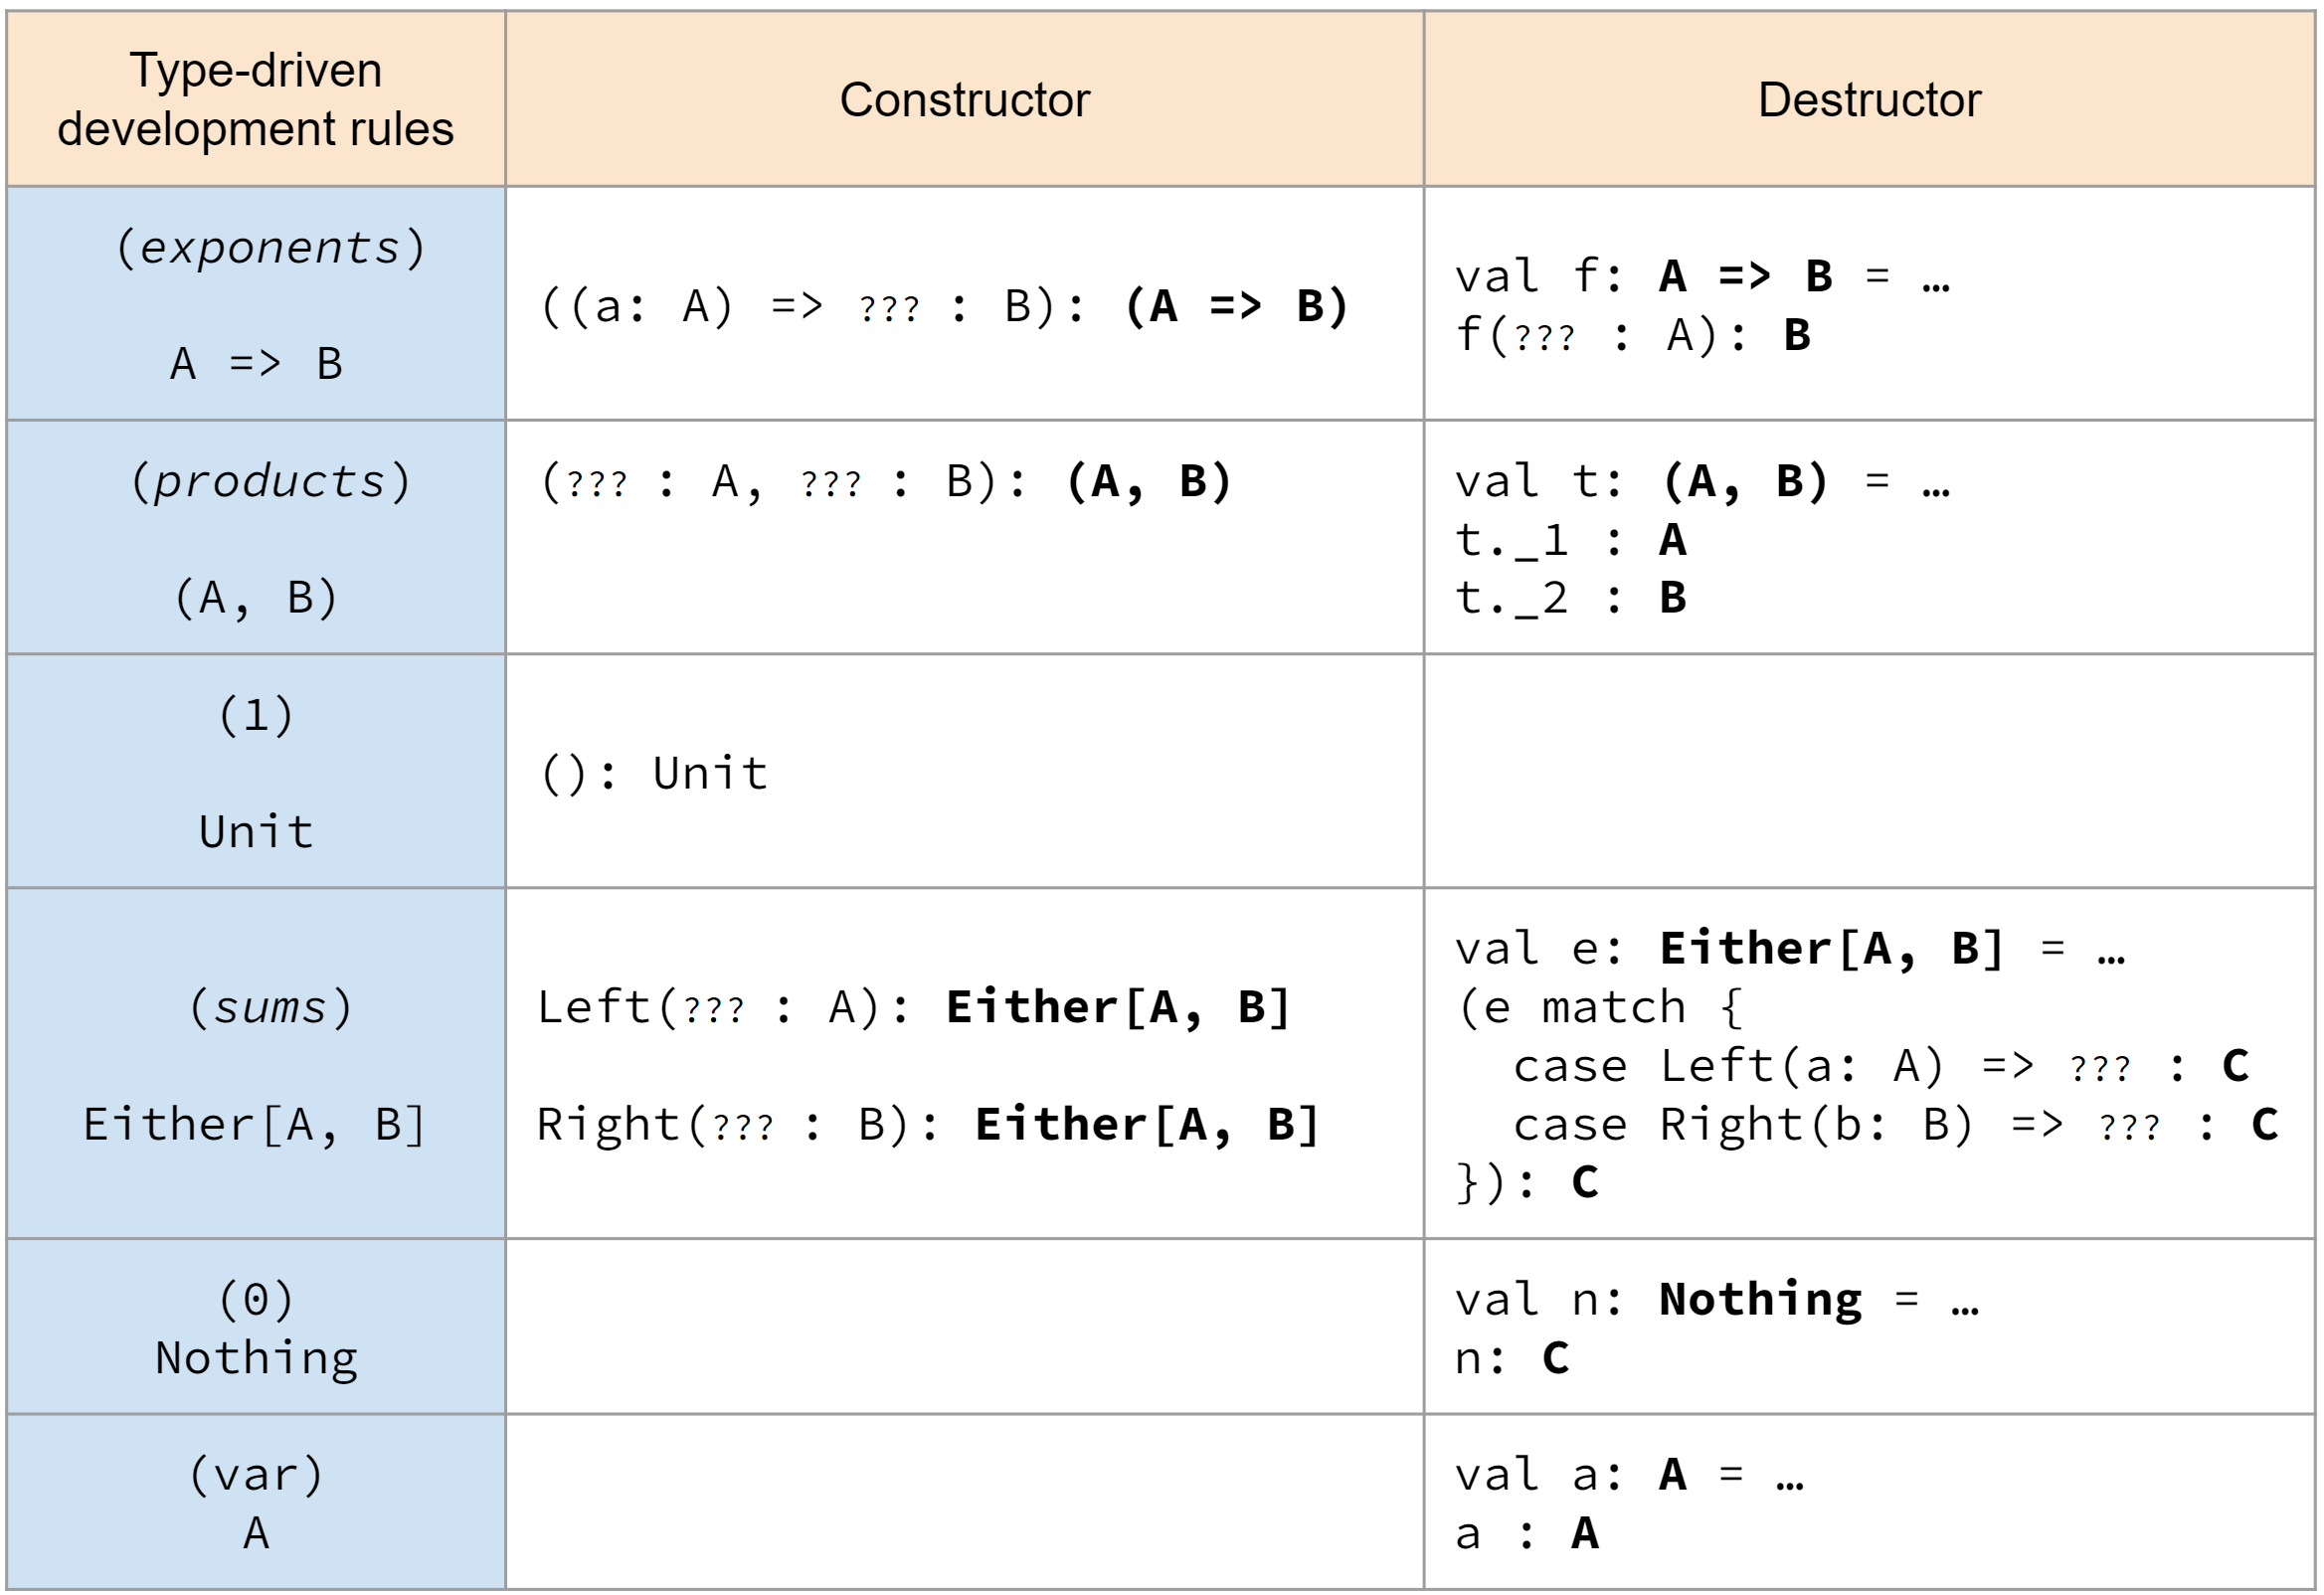

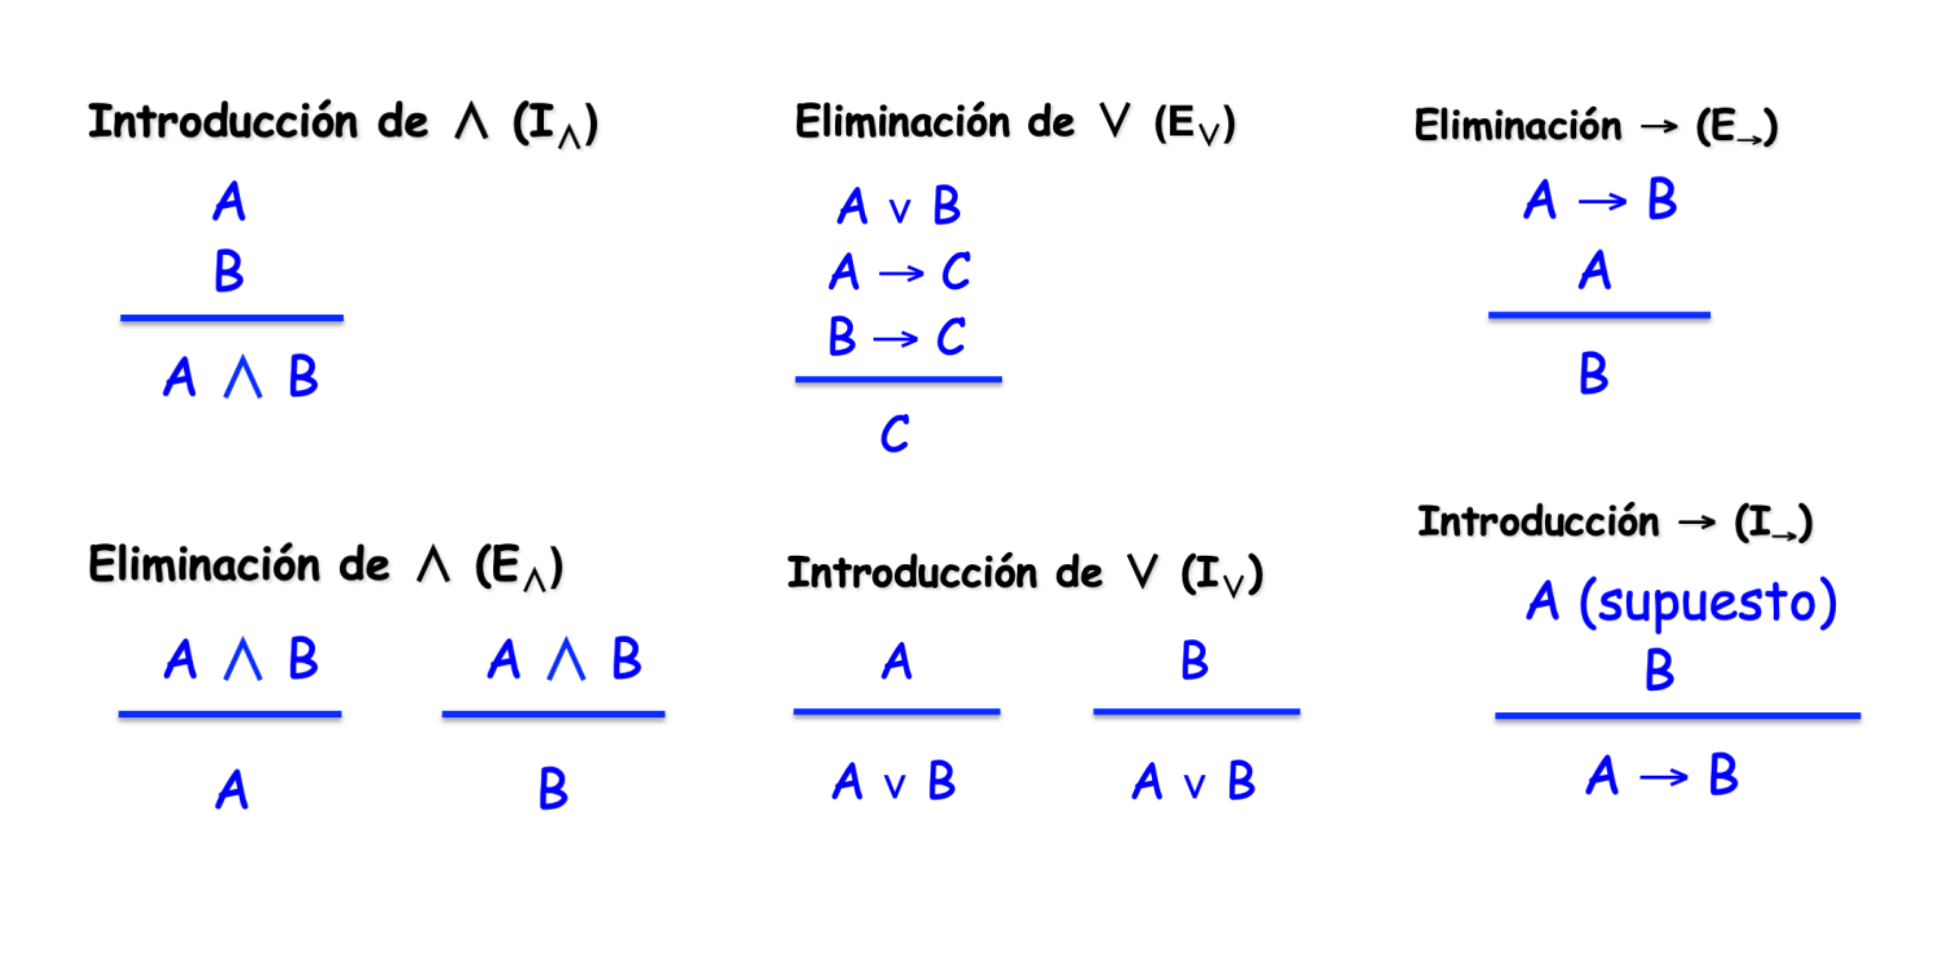

In [27]:
def foo[P, Q]: ((P => Q, P)) => Q = 
    ??? 

defined function foo

In [25]:
type P = Char
type Q = Int
type A = (P => Q, P) => Q


lazy val a: A = (f: P => Q, p: P) => ??? : Q

defined type P
defined type Q
defined type A
a: (P => Q, P) => Q = <lazy>

In [26]:
type P = Char
type Q = Int
type A = ((P=>Q, P)) => Q

lazy val a: A = (t: (P => Q, P)) => ??? : Q

defined type P
defined type Q
defined type A
a: ((P => Q, P)) => Q = <lazy>

so that, for instance, the following type:

```scala
(P => Q, P) => Q
```

corresponds to the following formula of propositional logic: 

$\hspace{0.8cm}(p \rightarrow q) \wedge p \rightarrow q$

Let's get used to read Scala types as propositional formulas with these examples: 

$$
\begin{array}{cc}
\mathrm{\bf Scala\ types} & \mathrm{\bf Propositions} \\
\hline
\mathtt{(P, Either[Q, R])} & p \wedge (q\vee r) \\ 
\mathtt{P => Q => (Q, R)} & p \rightarrow q \rightarrow q \wedge r \\
\mathtt{(P => Nothing) => Nothing} & (p \rightarrow \bot) \rightarrow \bot \\ 
\end{array}
$$

What about logical negation and equivalence? They are commonly regarded as abbreviations: 

* $\neg p$ abbreviates $p \rightarrow \bot$ (i.e. if we assume $p$, we reach a contradiction)
* $p \leftrightarrow q$ abbreviates $p \rightarrow q \wedge q \rightarrow p$ 

so, they will be represented in Scala through the following type aliases: 

In [2]:
// Complete definitions

type Not[P] = Nothing
type <=>[P, Q] = Nothing

defined type Not
defined type <=>

Let's translate the following propositional formulas to Scala types: 


$$ 
\begin{array}{cc}
\mathrm{\bf Logic} & \mathrm{\bf Scala\ ADTs} \\
\hline
(p \wedge q \rightarrow r) \leftrightarrow (p \rightarrow q \rightarrow r) & \mathtt{(((P,Q)) => R) <=> (P => Q => R)} \\
\neg (p \wedge q) \rightarrow \neg p \vee \neg q & \mathtt{Not[(P, Q)] => Either[Not[P], Not[Q]]}\\
\neg\neg(p \vee \neg p) & \mathtt{Not[Not[Either[P, Not[P]]]]}\\
p \vee (q \wedge r) \leftrightarrow (p \vee q) \wedge (p \vee r) & 
\mathtt{Either[P, (Q, R)] <=> (Either[P, Q], Either[P, R])}
\end{array}
$$


Note that $p \wedge q \rightarrow r$ translates to `((P,Q)) => R`, and not to `(P, Q) => R`. The former is a `Function1` which receives a single argument of tuple type `(P, Q)`; the latter is a `Function2` which receives two arguments of types `P` and `Q`. 

# Proofs as programs

Right, but this is just a syntactic rewriting. In which sense, for instance, the Scala type

`(P, Either[Q, R]) => Either[(P, Q), (P, R)]`

is a proper counterpart of the proposition
$p \wedge (q \vee r) \rightarrow p \wedge q \vee p \wedge r$? The answer is that they behave exactly in the same way: we can implement a program (expression or term) of that type if, and only if, the corresponding proposition is a theorem. Thus, the program is a witness that the proposition can be proved; in fact, we can automatically obtained a proof from that program, and viceversa. Let's start from a possible program:



In [2]:
// Ad-hoc program implementation


How is this program related to a proof of $p \wedge (q \vee r) \rightarrow p \wedge q \vee p \wedge r$? In order to talk about proofs we need a formal system, and our proof system of choice is Gentzen's natural deduction system. These are its introduction and elimination rules: 

![natural deduction rules](../../images/natdedrules.png)

Or, in more familiar terms: 

In [35]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    ??? : (((P, Either[Q, R])) => Either[(P, Q), (P, R)] )

defined function proof

In [37]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    (t: (P, Either[Q, R])) => 
        ??? : Either[(P, Q), (P, R)]

defined function proof

In [37]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    (t: (P, Either[Q, R])) => 
        val p: P = t._1
        val e: Either[Q, R] = t._2
        ??? : Either[(P, Q), (P, R)]

defined function proof

In [38]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    (t: (P, Either[Q, R])) => 
        val p: P = t._1
        val e: Either[Q, R] = t._2
        e match 
            case Left(q) => ??? : Either[(P, Q), (P, R)]
            case Right(r) => ??? : Either[(P, Q), (P, R)]

defined function proof

In [39]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    (t: (P, Either[Q, R])) => 
        val p: P = t._1
        val e: Either[Q, R] = t._2
        e match 
            case Left(q) => 
                val t: (P, Q) = (p, q)
                ??? : Either[(P, Q), (P, R)]
            case Right(r) => 
                val t: (P, R) = (p, r)
                ??? : Either[(P, Q), (P, R)]

defined function proof

In [40]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    (t: (P, Either[Q, R])) => 
        val p: P = t._1
        val e: Either[Q, R] = t._2
        e match 
            case Left(q) => 
                val t: (P, Q) = (p, q)
                Left(t) : Either[(P, Q), (P, R)]
            case Right(r) => 
                val t: (P, R) = (p, r)
                Right(t) : Either[(P, Q), (P, R)]

defined function proof

In [41]:
def proof[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    case (p, Left(q)) => Left((p,q))
    case (p, Right(r)) => Right((p,r))

defined function proof

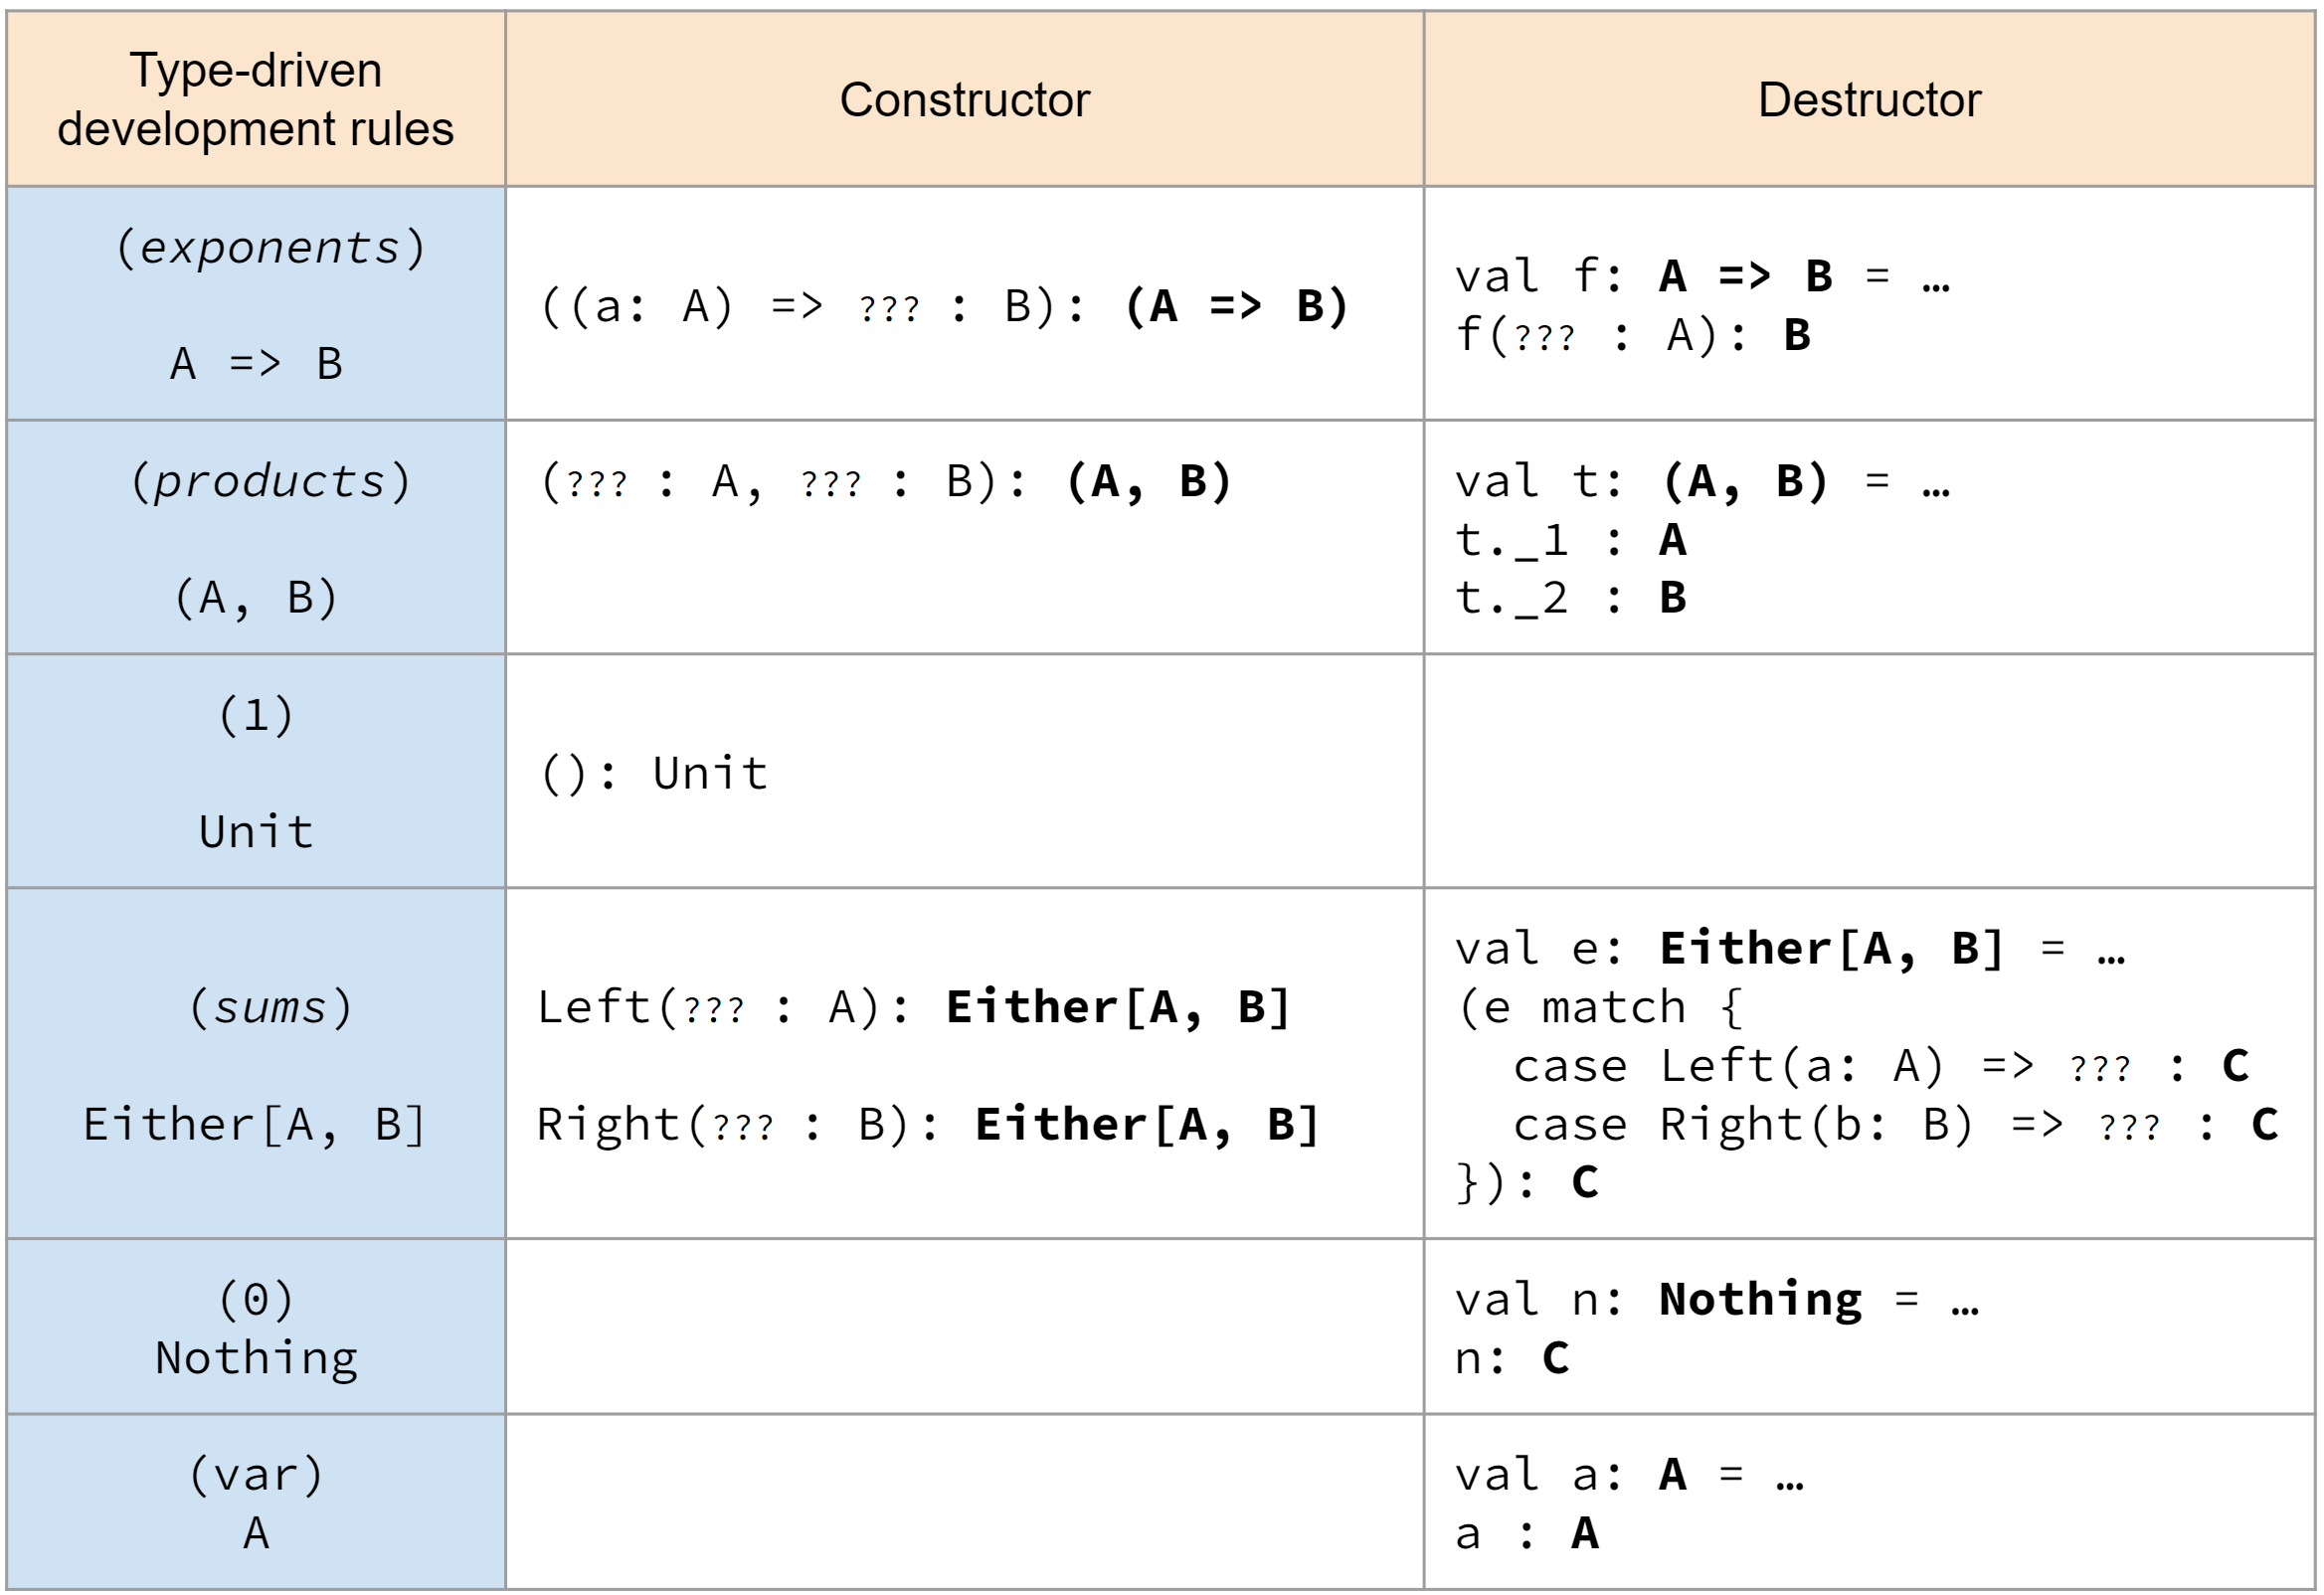

$$
\begin{array}{llr}
     & p \wedge (q \vee r) \rightarrow (p \wedge q) \vee (p \wedge r) & 
\end{array}
$$

In [ ]:
p^(qvr)                         supuesto
p                               E^
qvr                             E^

q                               supuesto
p^q                             I^
p^q v p^r                       Iv
q -> p^q v p^r                  I->

r                               supuesto
p^r                             I^
p^q v p^r                       Iv
r -> p^q v p^r                  I->

p^q v p^r                       Ev 
p^(qvr)->p^q v p^r              I->

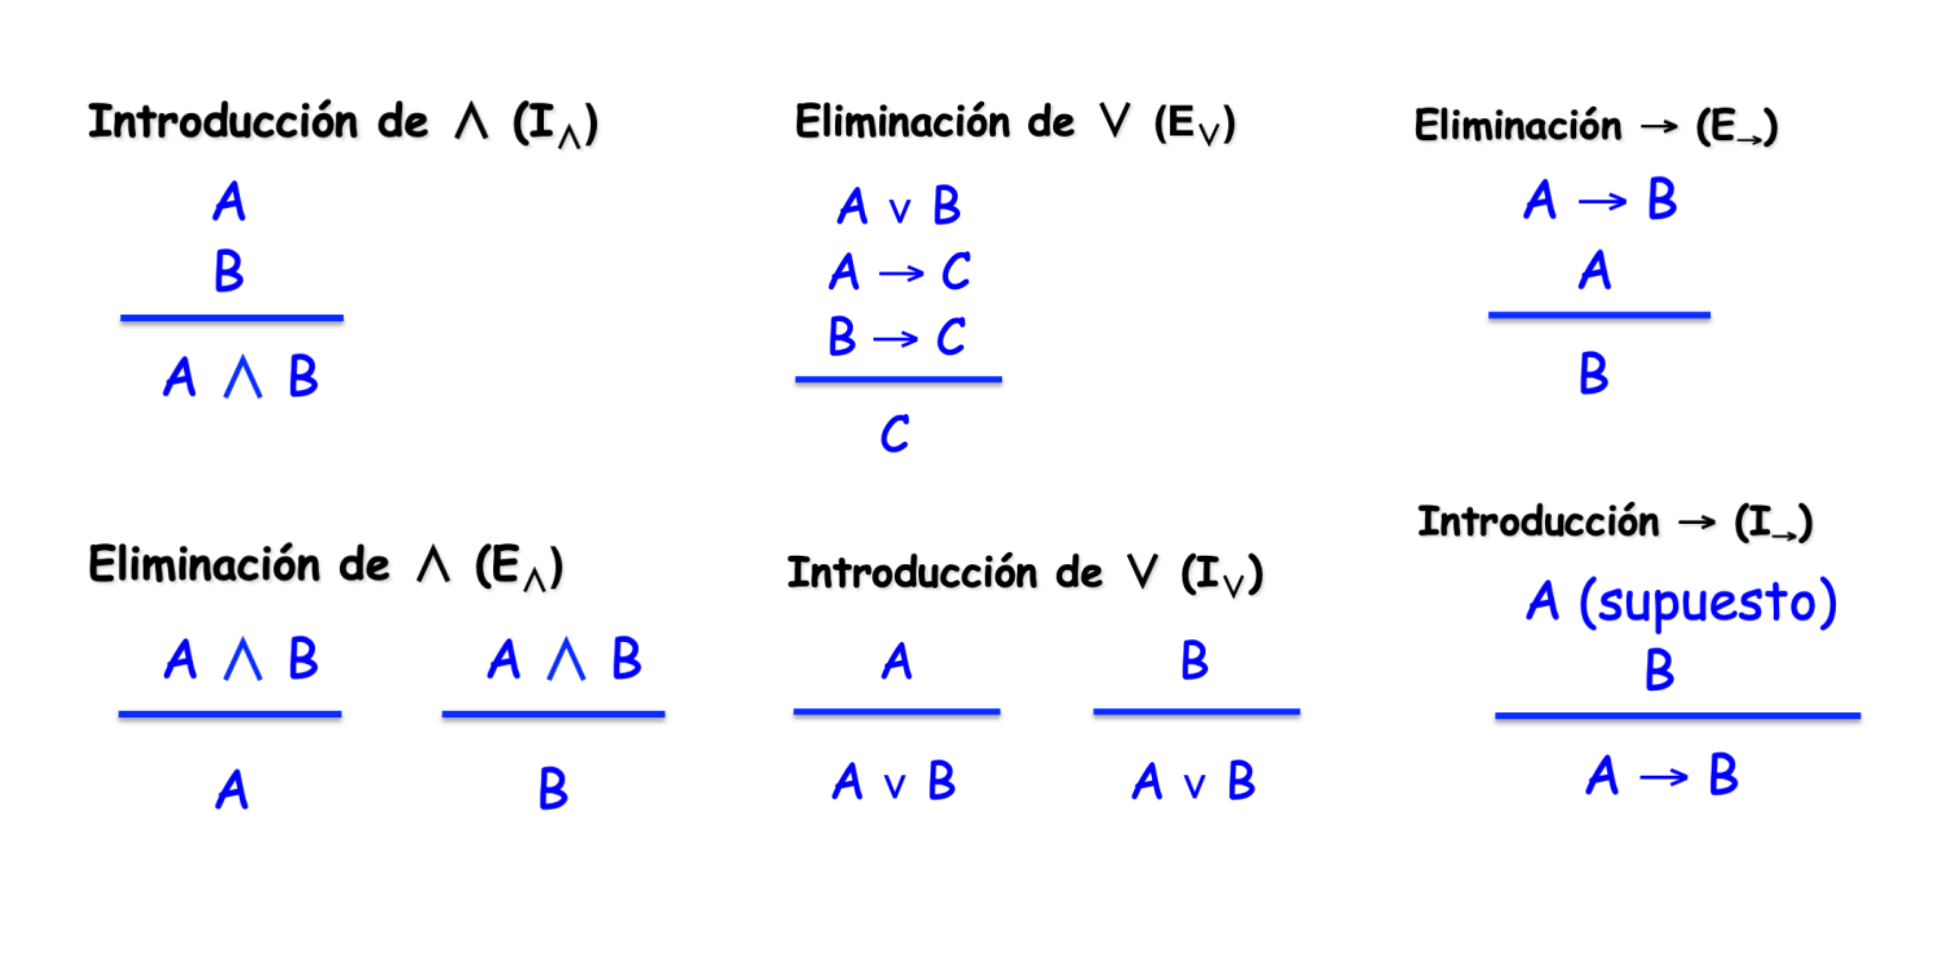

Note that we only have two rules more: the axiom (`Ax`) and elimination rule for `false` ($ \bot E$). 

Now, we can give a proof as follows:

$$
\begin{array}{llr}
1     & p \wedge (q \vee r) & premise \\
1.1   & p  & \wedge E(1) \\
1.2   & q \vee r & \wedge E(1) \\
&& \\
1.3   & q & premise \\
1.3.1 & p \wedge q & \wedge I(1.1,1.3) \\
1.3.2 & (p \wedge q) \vee (p \wedge r) & \vee I(1.3.1) \\
&& \\ 
1.4   & r & premise \\
1.4.1 & p \wedge r & \wedge I(1.1,1.4) \\
1.4.2 & (p \wedge q) \vee (p \wedge r) & \vee I(1.4.2) \\
&& \\
1.5   & (p \wedge q) \vee (p \wedge r) & \vee E(1.3-1.3.2,1.4-1.4.2,1.2) \\
2     & p \wedge (q \vee r) \rightarrow (p \wedge q) \vee (p \wedge r) & \rightarrow I(1-1.5)
\end{array}
$$

Apparently, this proof is at odds with the previous program, but algebraic data types also work in terms of introduction and ellimination rules, much in the same way as Gentzen's introduction and elimination rules: 


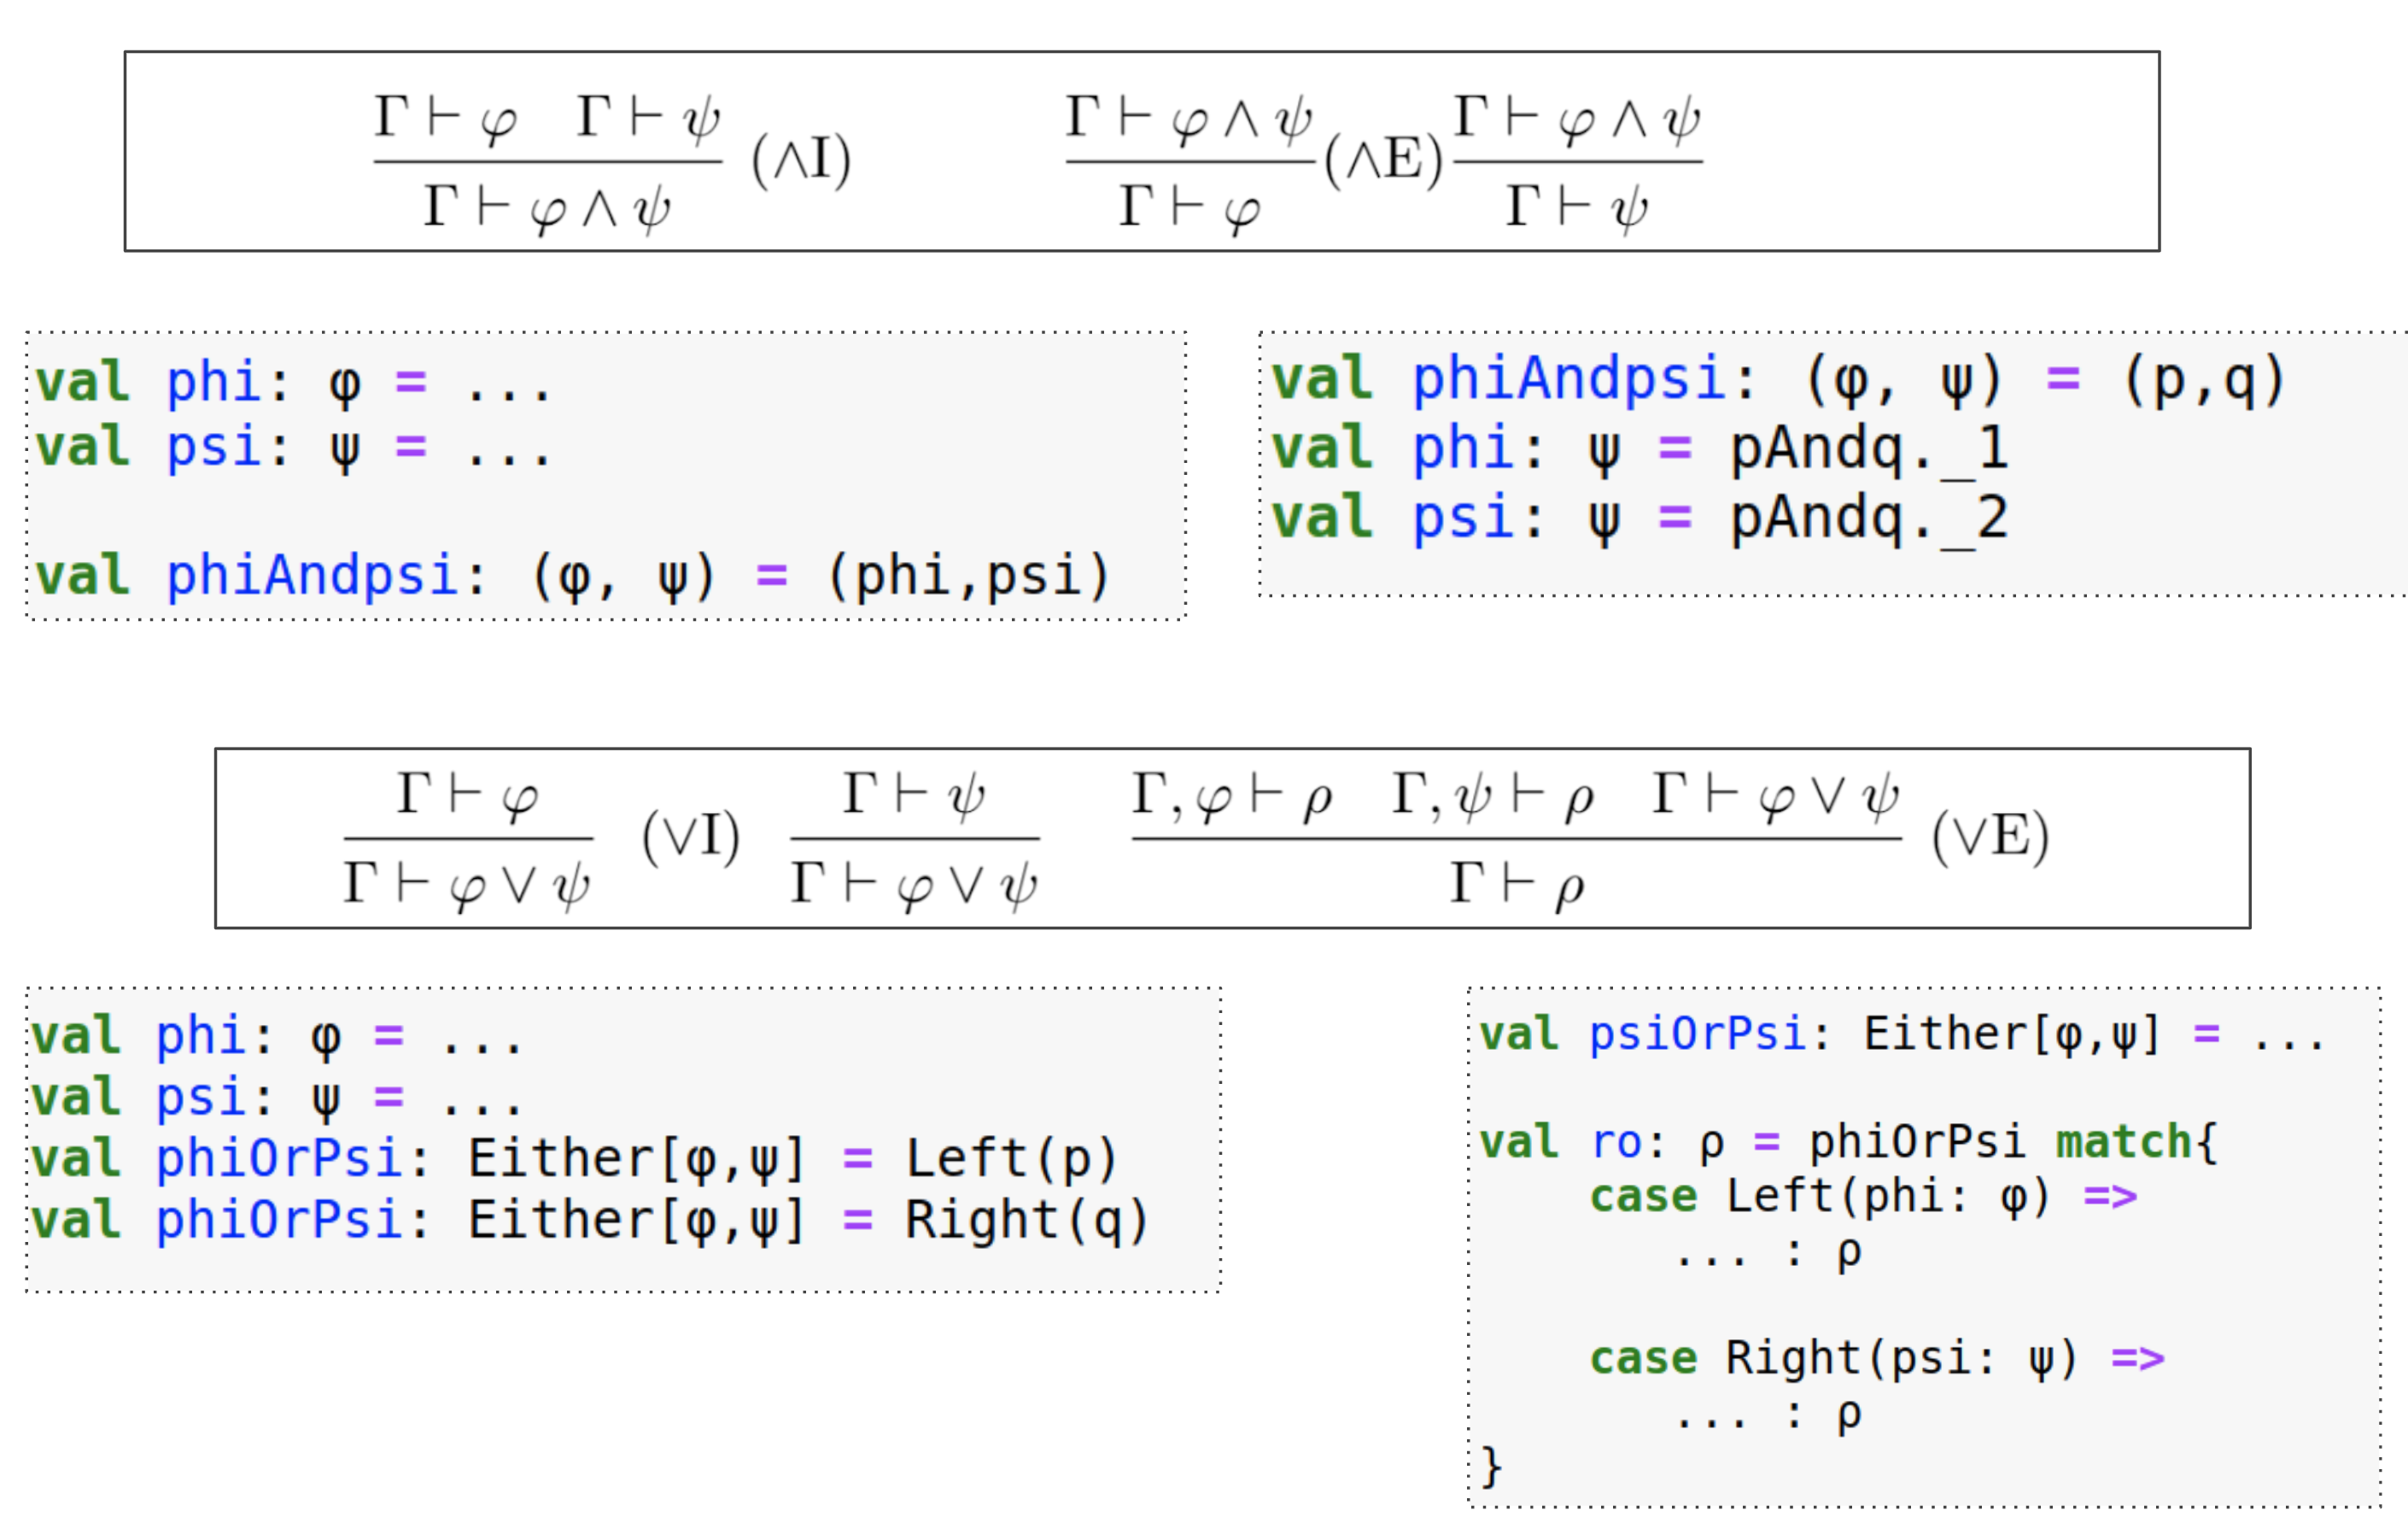

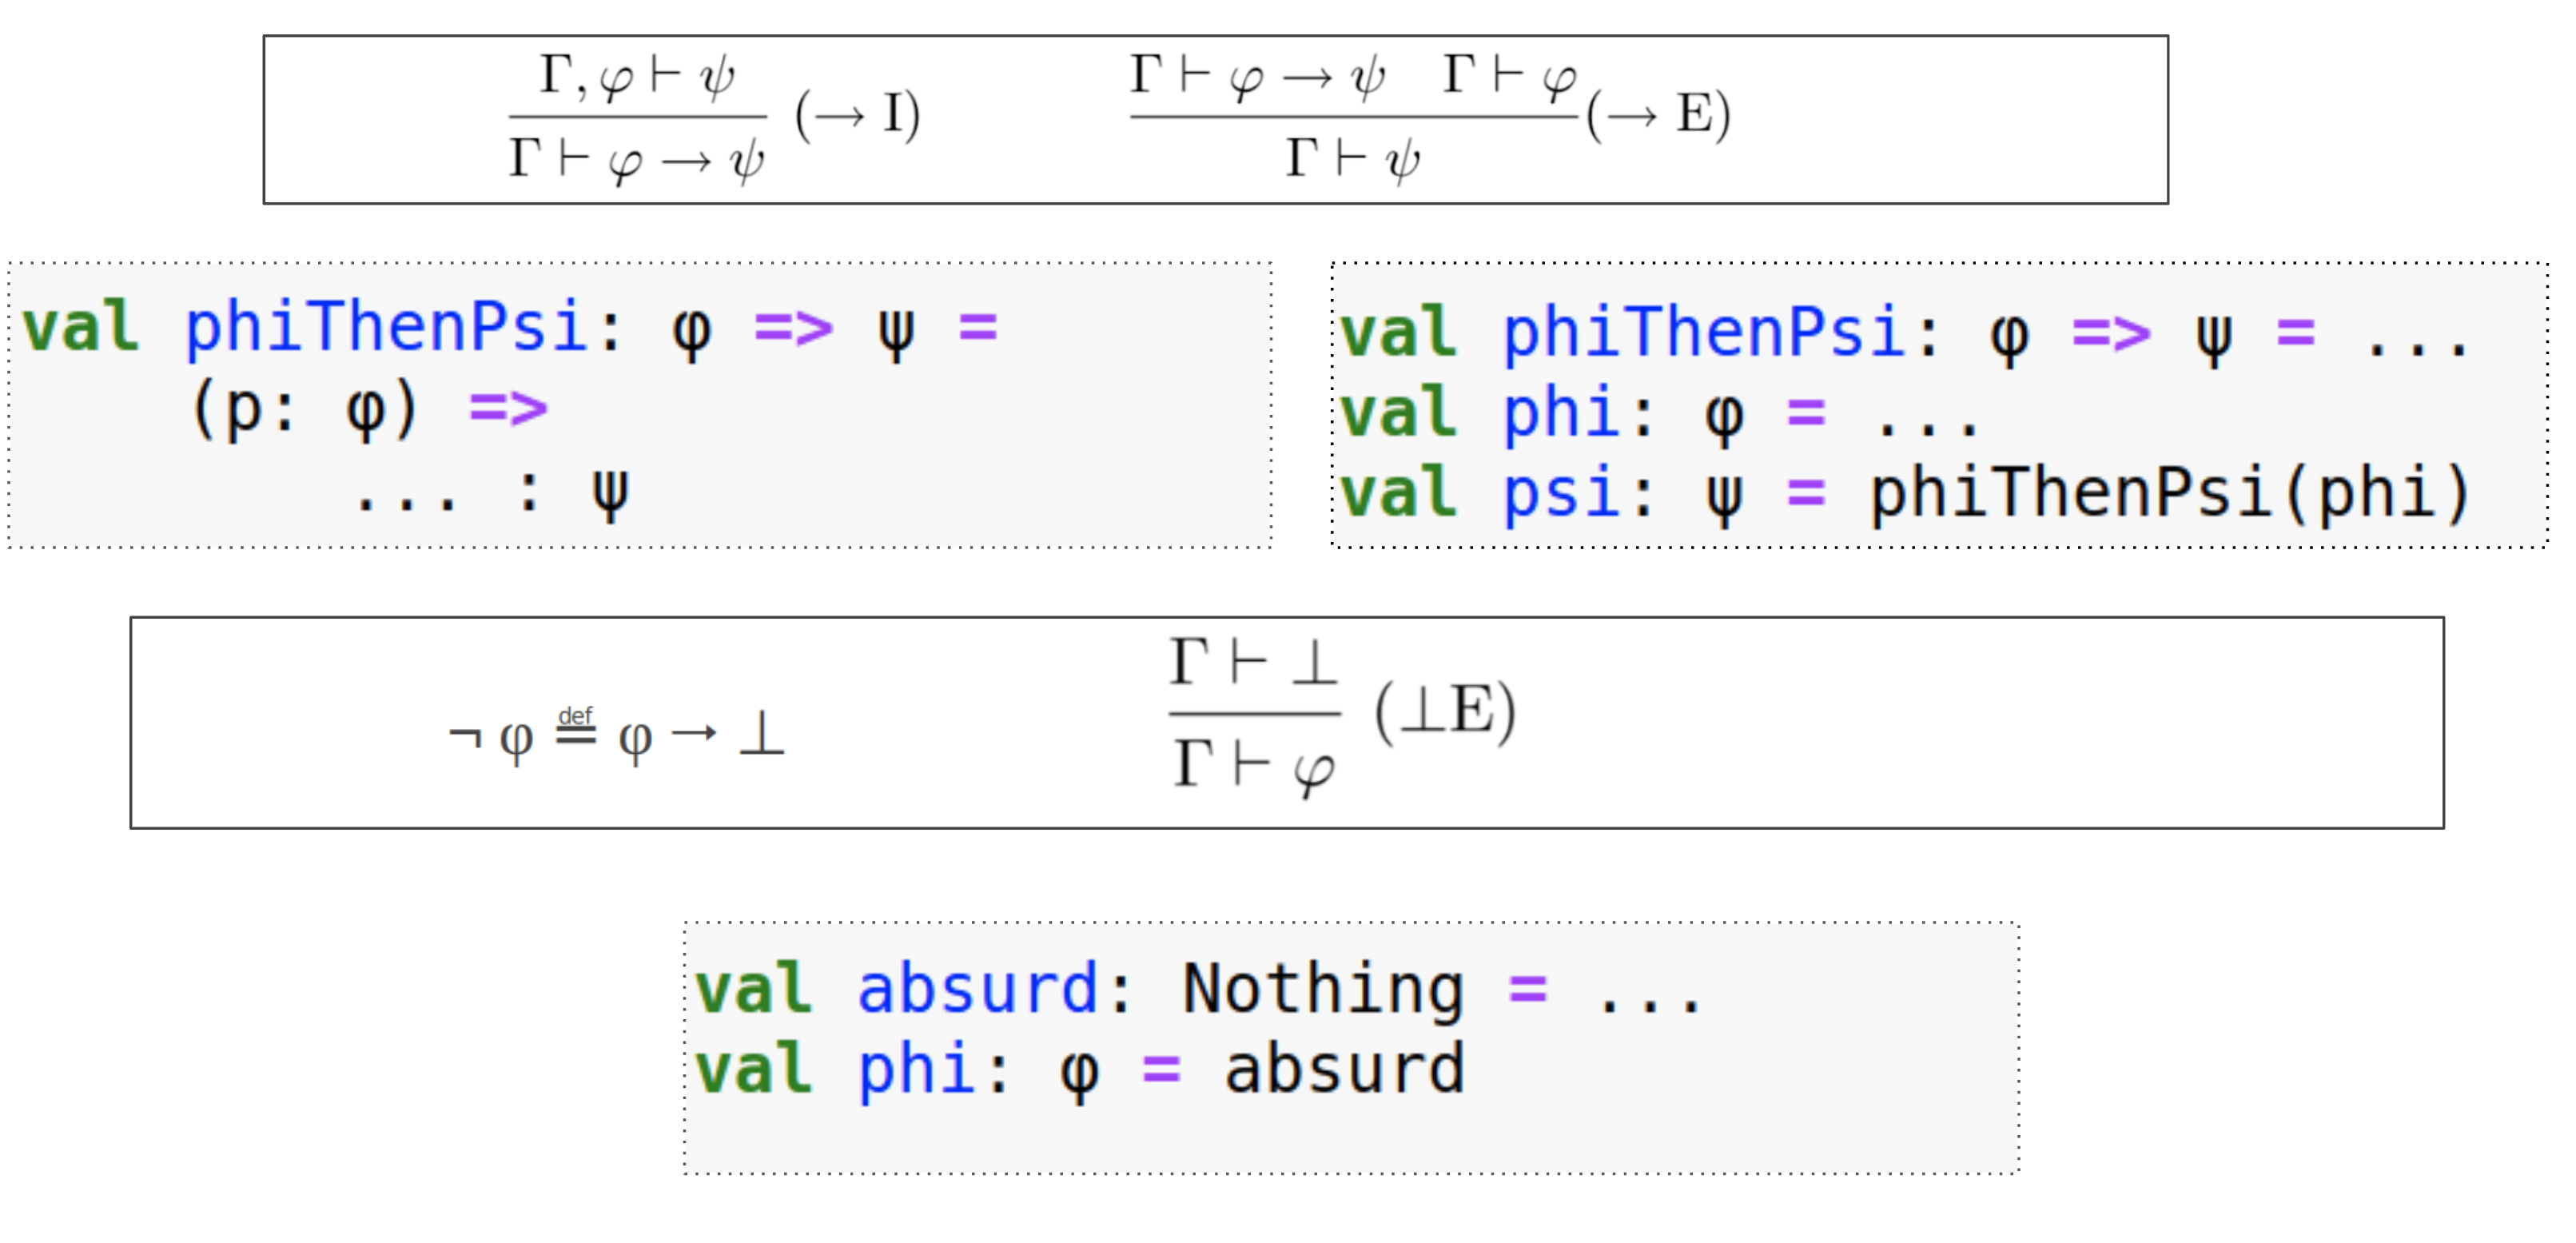

In sum, the rules for introducing and elliminating logical operators of the natural deduction system for propositional logic, are in __one-to-one__ correspondence with the constructors and destructors of algebraic data types: 

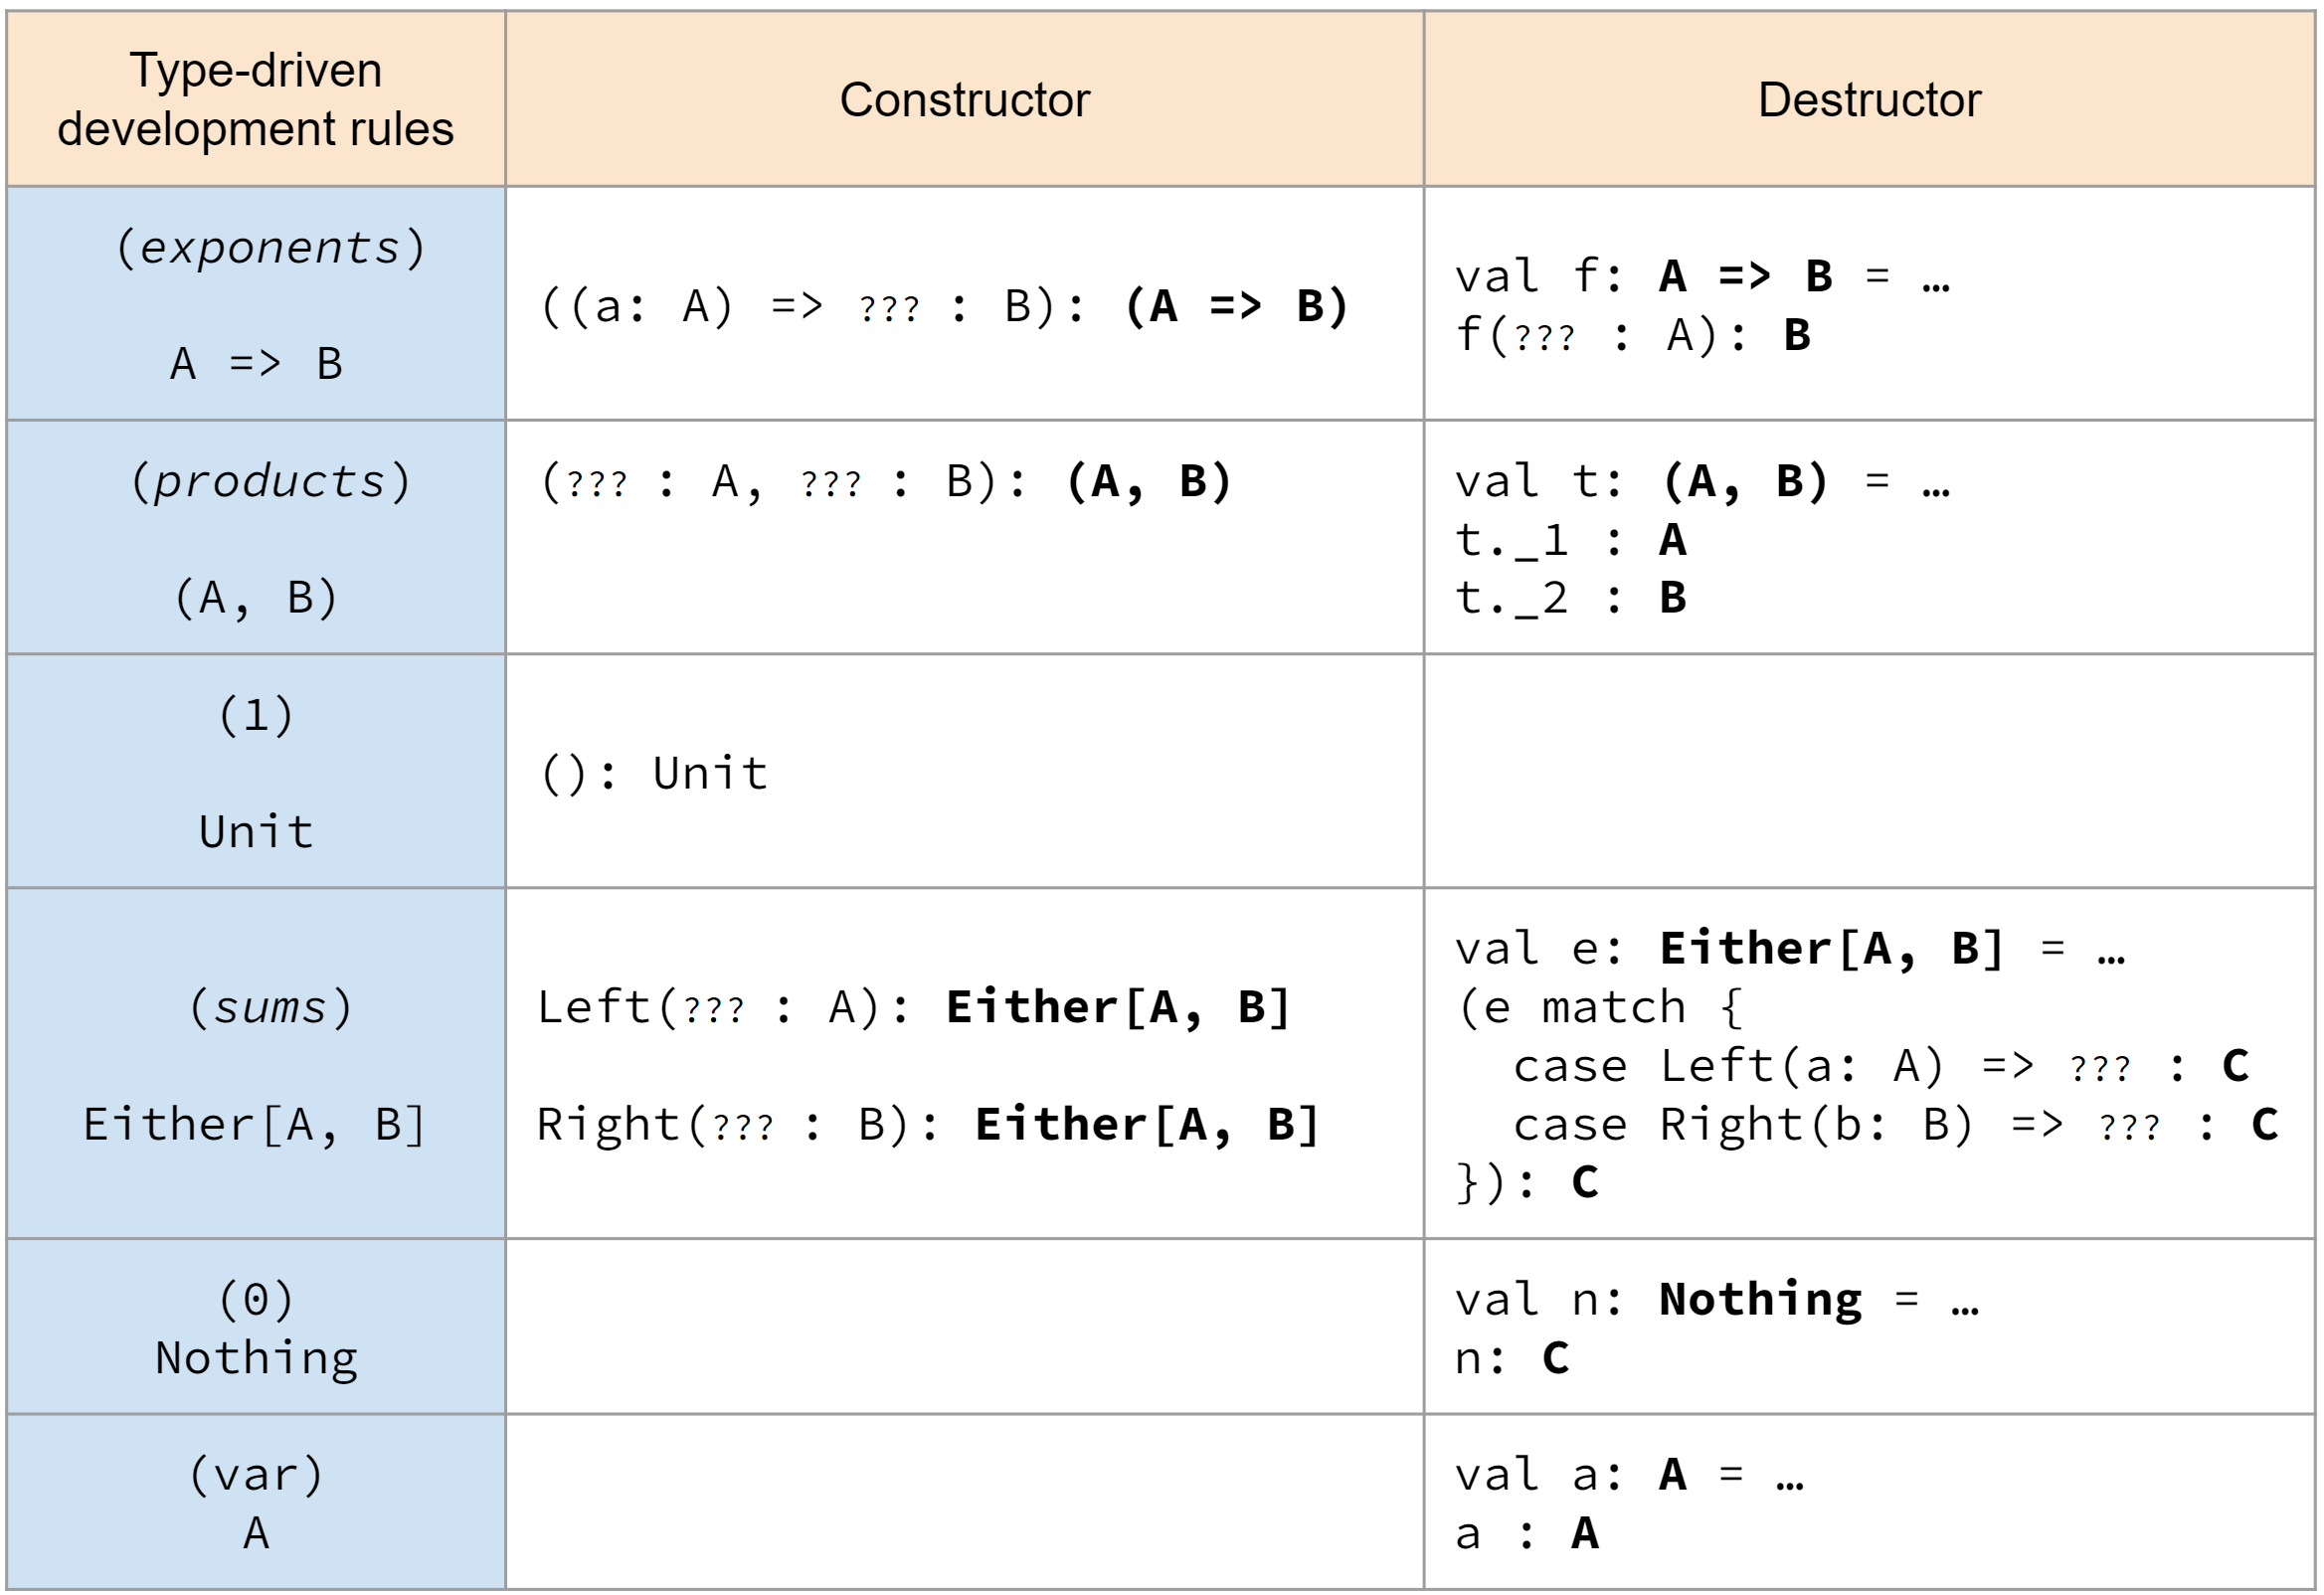

In order to emphasize this, let's reimplement our program in a more verbose way: 

In [6]:
def program[P, Q, R]: ((P, Either[Q, R])) => Either[(P, Q), (P, R)] = 
    case (p, Left(q)) => Left((p, q))
    case (p, Right(r)) => Right((p, r))

defined function program

As we can see, conjunction behaves very much like products, in the sense that the introduction rule $\wedge.I$ corresponds to the product constructor `(_, _)`, and the elimination rule $\wedge.E$ to the selectors `_._1` and `_._2`. Similarly, the introduction rule for disjunction corresponds to the constructors of `Either`, i.e. `Left(_)` and `Right(_)`, and the elimination rule to pattern matching. Last, the introduction of an implication corresponds to the contruction of a lambda expression, and its elimination (not illustrated in the example), to function application. We can obtain an even more closer correspondence between the program and its corresponding proof with the following type aliases and definitions:

In [15]:
object Ax:
    def apply[P](a: P): P = a

type ⟶[A, B] = A => B

object `⟶`:
    def I[A, B](f: A => B): A ⟶ B =
        f
    
    def E[A, B](f: A ⟶ B)(a: A): B = 
        f(a)

type ⊥ = Nothing 

object `⊥`:
    def E[A](a: ⊥): A = a

type ∨[A, B] = Either[A, B]

object `∨`:
    def IL[A, B](a: A): A ∨ B = Left(a)

    def IR[A, B](b: B): A ∨ B = Right(b)
    
    def E[A, B, C](f: A => C, g: B => C)(or: A ∨ B): C = 
        or match
            case Left(a: A) => f(a)
            case Right(b: B) => g(b)

type ∧[A, B] = (A, B)

object `∧`:
    def I[A, B](a: A, b: B): A ∧ B = (a, b)
    
    def EL[A, B](and: A ∧ B): A = and._1
    
    def ER[A, B](and: A ∧ B): B = and._2

defined object Ax
defined type ⟶
defined object ⟶
defined type ⊥
defined object ⊥
defined type ∨
defined object ∨
defined type ∧
defined object ∧

Together, they fully implement the introduction and ellimination rules of the natural deduction system introduced above. We can also add these aliases for negation and equivalence. 

In [16]:
type ¬[A] = A ⟶ ⊥
type ⟷[A, B] = (A ⟶ B) ∧ (B ⟶ A)

defined type ¬
defined type ⟷

The following aliases will also come in handy if we can't easily type unicode characters:

In [17]:
type Absurd = ⊥
type Or[A, B] = ∨[A, B] 
type And[A, B] = ∧[A, B]
val Implies = ⟶
val Or = ∨ 
val And = ∧

defined type Absurd
defined type Or
defined type And
Implies: cell17.this.cell15.⟶.type = ammonite.$sess.cell15$Helper$$u27F6$@f6c0e99
Or: cell17.this.cell15.∨.type = ammonite.$sess.cell15$Helper$$u2228$@fecfd13
And: cell17.this.cell15.∧.type = ammonite.$sess.cell15$Helper$$u2227$@6c575223

Now, we can re-implement our program so that its correspondence with the natural deduction proof is more than apparent:

In [20]:
def proof[P, Q, R]: (P ∧ (Q ∨ R)) ⟶ ((P ∧ Q) ∨ (P ∧ R)) = 
    ⟶.I( (`1`: P ∧ (Q ∨ R)) =>                       // 1     p ∧ (q ∨ r) 
        val `1.1`: P = ∧.EL(`1`)                      // 1.1   p 
        val `1.2`: Q ∨ R = ∧.ER(`1`)                  // 1.2   q ∨ r 
        ∨.E(
            (`1.3`: Q) =>                             // 1.3   q
              val `1.3.1`: P ∧ Q = ∧.I(`1.1`, `1.3`)  // 1.3.1 p ∧ q 
              ∨.IL(`1.3.1`)                           // 1.3.2 (p ∧ q) ∨ (p ∧ r)
            , 
            (`1.4`: R) =>                             // 1.4   r
              val `1.4.1`: P ∧ R = ∧.I(`1.1`, `1.4`)  // 1.4.1 p ∧ r 
              ∨.IR(`1.4.1`)                           // 1.4.2 (p ∧ q) ∨ (p ∧ r)
            )(
            `1.2`): (P ∧ Q) ∨ (P ∧ R)                 // 1.5   (p ∧ q) ∨ (p ∧ r)
    ) : (P ∧ (Q ∨ R)) ⟶ ((P ∧ Q) ∨ (P ∧ R))          // 2     p ∧ (q ∨ r) ⟶ (p ∧ q) ∨ (p ∧ r)

defined function proof

# More examples

Let's see some more examples which show how to prove a theorem with a functional program.

# $\vdash (p \rightarrow q) \wedge p \rightarrow q$

In [22]:
// Ad-hoc program

defined function program

Believe it or not, the program above corresponds exactly to the following proof:

$$
\begin{array}{llr}
1 & (p \rightarrow q) \wedge p & premise \\
1.1 & p \rightarrow q & \wedge E(1) \\
1.2 & p  & \wedge E(1) \\
1.3 & q  & \rightarrow E(1.1,1.2) \\
2 & (p \rightarrow q) \wedge p \rightarrow q & \rightarrow I(1-1.3)
\end{array}
$$

as this re-implementation shows:

In [24]:
// Type-driven implementation


defined function proof

# $\vdash p \vee q \rightarrow (\neg p \rightarrow q)$ 

In [2]:
type Not[P] = P => Nothing
type <=>[P, Q] = (P => Q, Q => P)

defined type Not

In [25]:
// Ad-hoc program
def proof[P, Q]: Either[P, Q] => (Not[P] => Q) = 
    ??? 

defined function proof

In [5]:
// Ad-hoc program
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ??? : (Either[P, Q] => Not[P] => Q)

defined function proof

In [6]:
// Constructor (functions)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) => ??? : (Not[P] => Q)): (Either[P, Q] => Not[P] => Q)

defined function proof

In [8]:
// Constructor (functions)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    (e: Either[P, Q]) => 
         ??? : (Not[P] => Q)

defined function proof

In [7]:
// Constructor (functions)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ??? : (Not[P] => Q)                        // ???
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [9]:
// Constructor (functions)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: Not[P]) =>                           // premise
              ??? : Q
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [10]:
// Destructor (sums)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: Not[P]) =>                           // premise
              (e match 
                  case Left(p: P) => 
                      ??? : Q
                  case Right(q: Q) => 
                      ??? : Q
               ): Q                                 // vE
          
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [10]:
// Destructor (sums)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: Not[P]) =>                           // premise
              (e match 
                  case Left(p: P) => 
                      ??? : Q
                  case Right(q: Q) => 
                      ??? : Q
               ): Q                                 // vE
          
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [12]:
// Destructor (vars)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: P => Nothing) =>                           // premise
              (e match 
                  case Left(p: P) => 
                      ??? : Q
                  case Right(q: Q) => 
                      q : Q                         // ax
               ): Q                                 // vE
          
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [13]:
// Destructor (vars)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: P => Nothing) =>                     // premise
              (e match 
                  case Left(p: P) => 
                      val absurd: Nothing = np(p)   // ->E
                      ??? : Q
                  case Right(q: Q) => 
                      q : Q                         // ax
               ): Q                                 // vE
          
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [16]:
// Destructor (Nothing)
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ((e: Either[P, Q]) =>                           // premise
         ((np: P => Nothing) =>                     // premise
              (e match 
                  case Left(p: P) =>                // premise
                      val absurd: Nothing = np(p)   // ->E
                      absurd : Q                    // NegE
               
                  case Right(q: Q) =>               // premise 
                      q : Q                         // ax
               ): Q                                 // vE
          
          ): (Not[P] => Q)                          // ->I
    ): (Either[P, Q] => Not[P] => Q)                // ->I

defined function proof

In [17]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    e =>
      np =>
              e match 
                  case Left(p) =>
                      val absurd: Nothing = np(p)
                      absurd
               
                  case Right(q: Q) =>  
                      q

defined function proof

In [18]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    e =>
        np =>
              e match 
                  case Left(p) =>
                      np(p)
               
                  case Right(q: Q) =>  
                      q

defined function proof

In [18]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    e =>
              e match 
                  case Left(p) =>
                    np => np(p)
               
                  case Right(q: Q) =>  
                    np => q

defined function proof

In [19]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
      case Left(p) =>
        np => np(p)
   
      case Right(q: Q) =>  
        np => q

defined function proof

In [20]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
      case Left(p) =>
        np => np(p)
   
      case Right(q: Q) =>  
        _ => q

defined function proof

In [23]:
// Idiomatic code
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
      case Left(p) => _(p)
      case Right(q) => _ => q

defined function proof

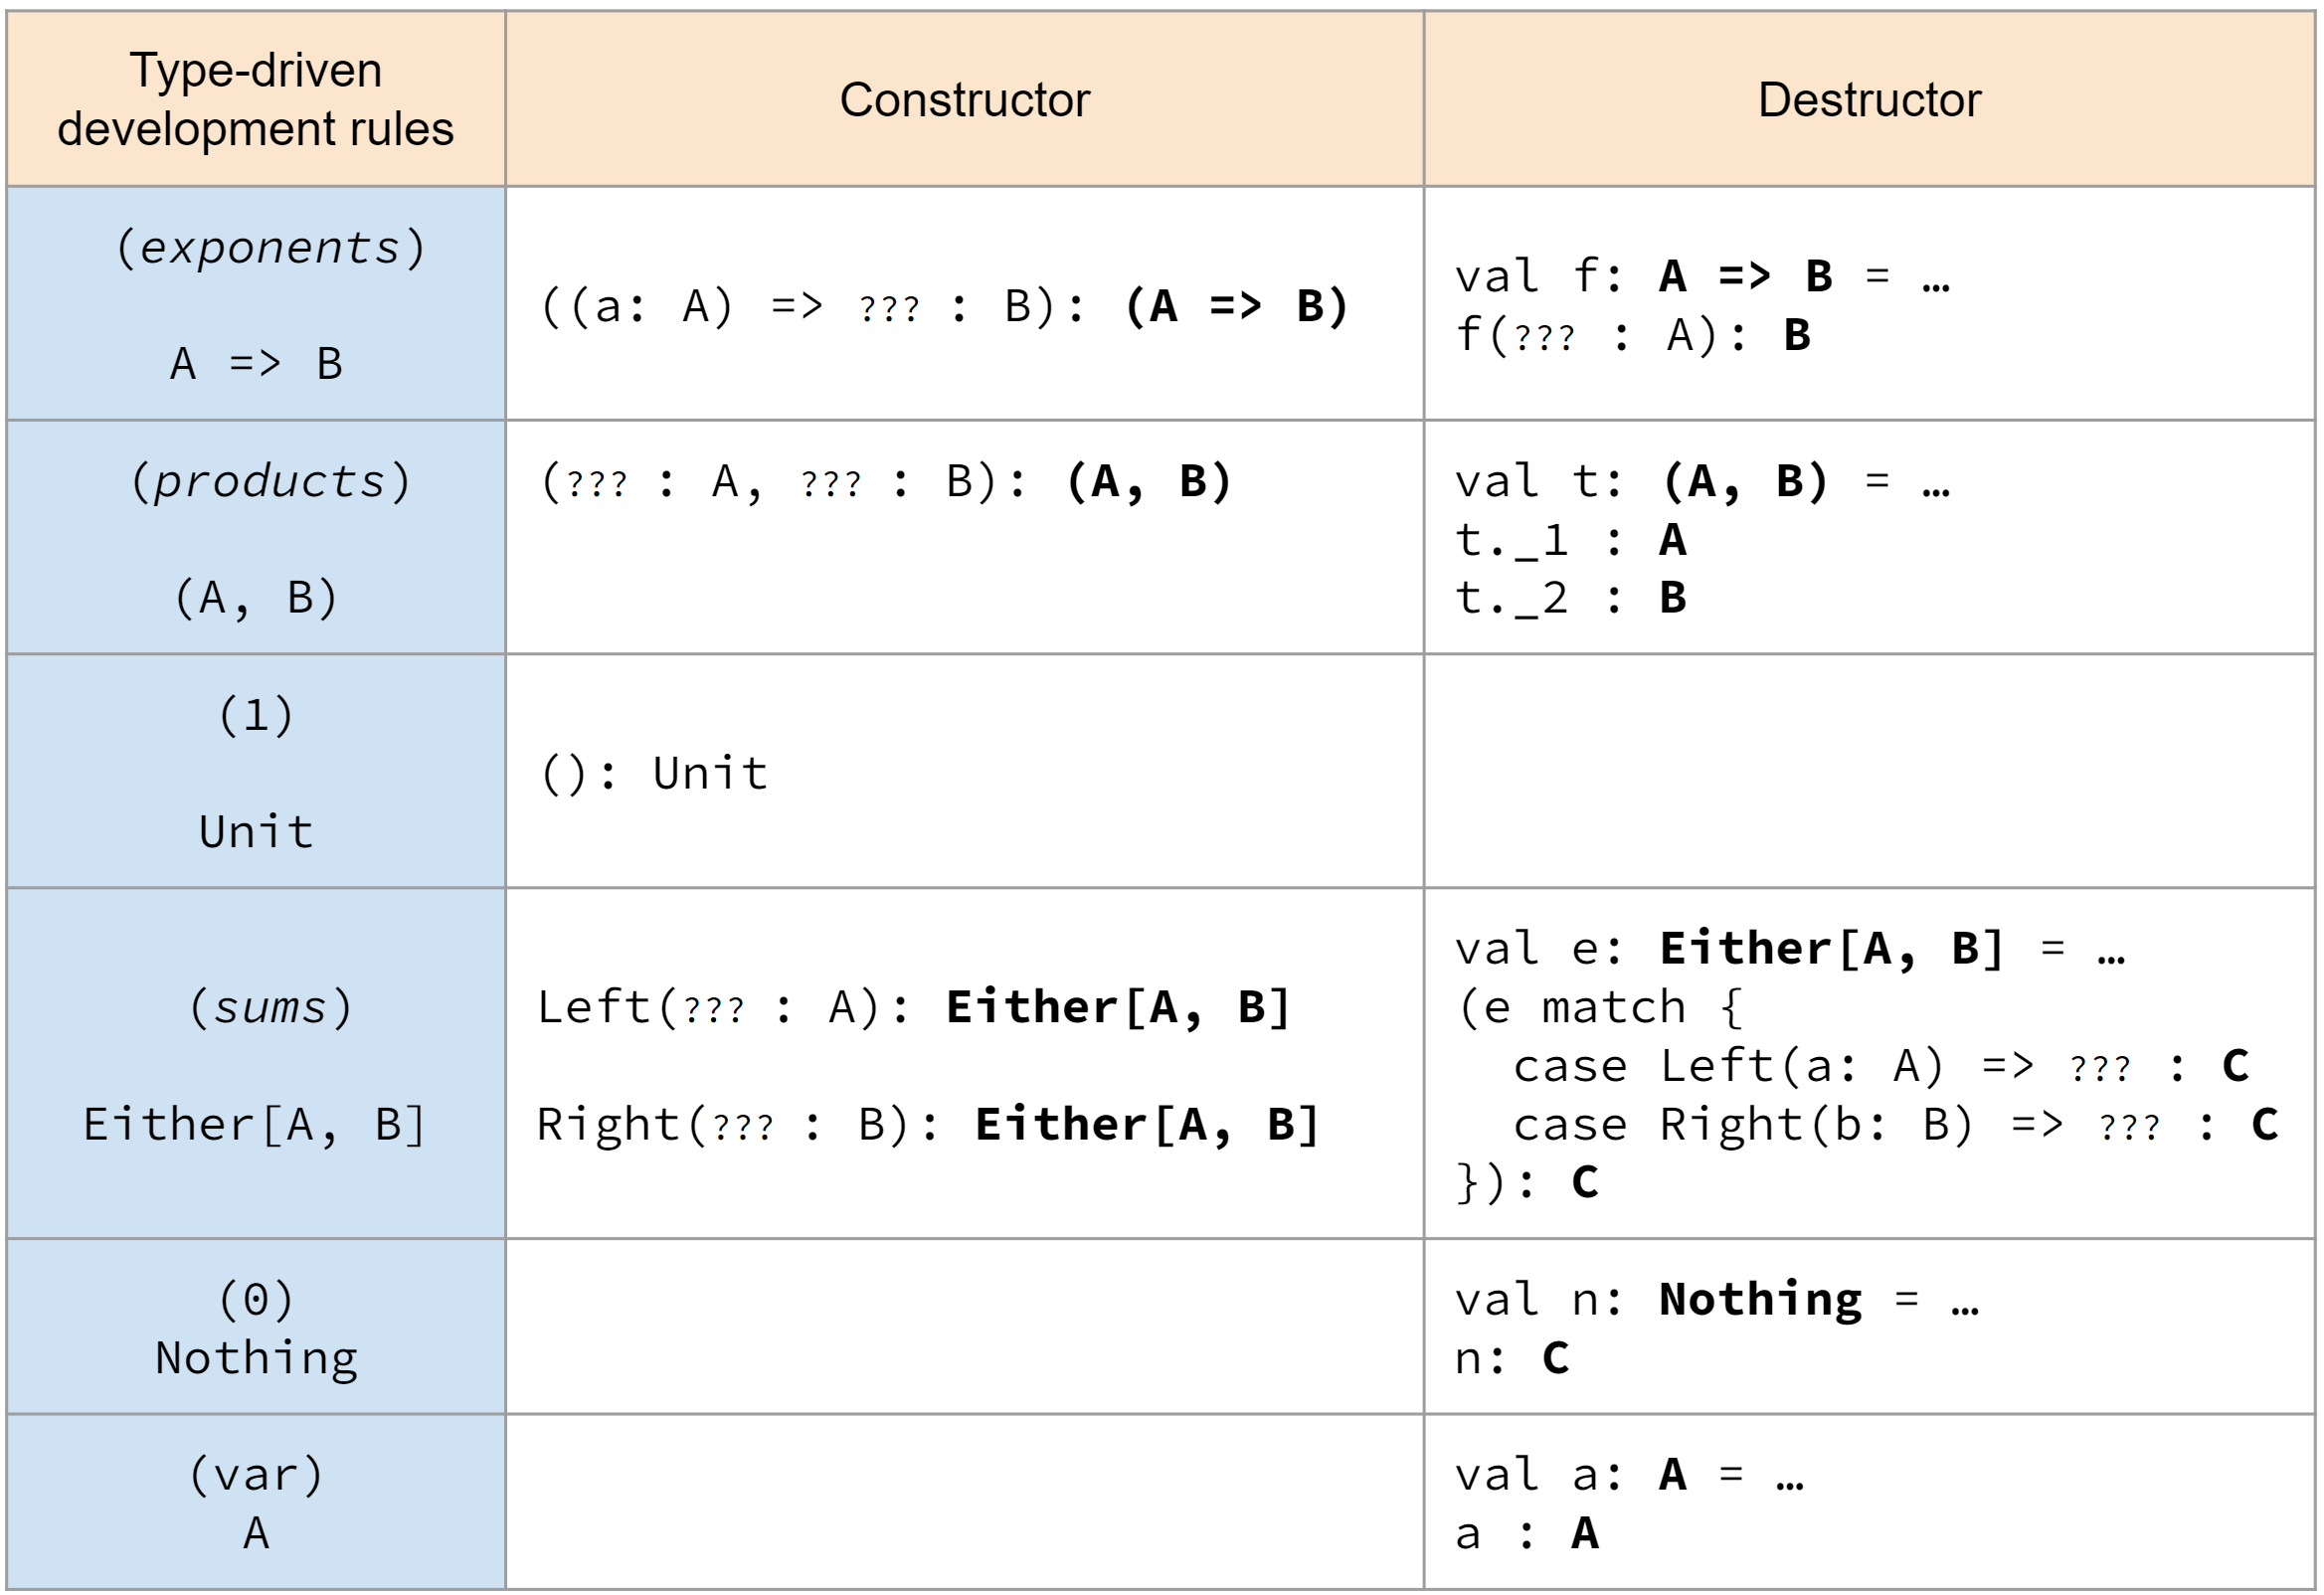

$$
\begin{array}{llr}
1 & p \vee q & \mathrm{premise} \\ 
1.1 & \neg p & \mathrm{premise} \\
&& \\
1.1.1 & p & \mathrm{premise} \\
1.1.1.1 & \bot & \rightarrow E(1.1,1.1.1) \\
1.1.1.2 & q & \bot E(1.1.1.1)\\
&& \\
1.1.2 & q & \mathrm{premise} \\
1.1.2.1 & q & \mathrm{Ax}(1.1.2) \\
&& \\
1.1.3 & q & \vee E(1.1.1-1.1.1.2,1.1.2-1.1.2.1,1)\\ 
1.2 & \neg p \rightarrow q & \rightarrow I(1.1-1.1.3)\\
2 & p \vee q \rightarrow \neg p \rightarrow q & \rightarrow I(1-1.2) 
\end{array}
$$

In [2]:
// type-driven program


# $\vdash (p \rightarrow \neg q) \rightarrow (p \rightarrow q) \rightarrow \neg p$

In [2]:
// Ad-hoc program


$$
\begin{array}{llr}
1 & p \rightarrow \neg q & premise \\
1.1 & p \rightarrow q & premise \\
1.1.1 & p & premise \\ 
1.1.1.1 & \neg q & \rightarrow E(1,1.1.1) \\
1.1.1.2 & q & \rightarrow E(1.1, 1.1.1) \\
1.1.1.3 & \bot & \rightarrow E(1.1.1.1,1.1.1.2) \\
1.1.2 & \neg p & \rightarrow I(1.1.1-1.1.1.3) \\
1.2 & (p \rightarrow q) \rightarrow \neg p & \rightarrow I(1.1-1.1.2)\\
2 & (p \rightarrow \neg q) \rightarrow (p \rightarrow q) \rightarrow \neg p & \rightarrow I(1-1.2)
\end{array}
$$

In [2]:
// type-driven program


# $\vdash (p \rightarrow q) \rightarrow (\neg q \rightarrow \neg p)$

In [2]:
// ad-hoc program


$$
\begin{array}{llr}
1 & p \rightarrow q  &  premise \\
1.1 & \neg q & premise \\
1.1.1 & p & premise \\ 
1.1.1.1 & q & \rightarrow E(1,1.1.1) \\
1.1.1.2 & \bot & \rightarrow E(1.1, 1.1.1.1) \\
1.1.2 & \neg p & \rightarrow I(1.1.1-1.1.1.2) \\
1.2 & \neg q \rightarrow \neg p & \rightarrow I(1.1-1.1.2)\\
2 & (p \rightarrow q) \rightarrow (\neg q \rightarrow \neg p) & \rightarrow I(1-1.2)
\end{array}
$$

In [2]:
// type-driven program


The previous examples were all positive ones: if we have a theorem, then we can implement the corresponding function. The opposite also works: if some proposition is not a theorem, then we won't be able to implement that function, no matter how hard we try.

# The intuitionistic stance

But, what about the following theorem? 

# $\vdash \neg (p \wedge q) \rightarrow \neg p \vee \neg q$

In [24]:
// Attempt to prove
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    ??? 

defined function proof

In [25]:
// Attempt to prove
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    ??? : (Not[(P, Q)] => Either[Not[P], Not[Q]])

defined function proof

In [26]:
// constructor (=>)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: Not[(P, Q)]) => 
        ??? : Either[Not[P], Not[Q]]

defined function proof

In [27]:
// constructor (Either)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: Not[(P, Q)]) => 
        Left(??? : Not[P]) : Either[Not[P], Not[Q]]

defined function proof

In [28]:
// constructor (Either)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: Not[(P, Q)]) => 
        Left(??? : P => Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [29]:
// constructor (=>)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: Not[(P, Q)]) => 
        Left((p: P) => ??? : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [31]:
// constructor (=>)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        Left((p: P) => ??? : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [33]:
// destructor (=>)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        Left((p: P) => npq(??? : (P, Q)) : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [35]:
// constructor (tuplas)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        Left((p: P) => npq((??? : P, ??? : Q)) : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [36]:
// destructor (var)
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        Left((p: P) => npq((p : P, ??? : Q)) : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [44]:
// destructor (var)
def proof[P, Q](LEM: Either[Q, Not[Q]]): Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        Left((p: P) => npq((p : P, ??? : Q)) : Nothing) : Either[Not[P], Not[Q]]

defined function proof

In [45]:
// destructor (var)
def proof[P, Q](LEM: Either[Q, Not[Q]]): Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        LEM match 
            case Left(q: Q) => 
                Left((p: P) => npq((p : P, ??? : Q)) : Nothing) : Either[Not[P], Not[Q]]
            case Right(nq: (Q => Nothing)) => 
                ??? : Either[Not[P], Not[Q]]

defined function proof

In [46]:
// destructor (var)
def proof[P, Q](LEM: Either[Q, Not[Q]]): Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: ((P, Q)) => Nothing) => 
        LEM match 
            case Left(q: Q) => 
                Left((p: P) => npq((p : P, q : Q)) : Nothing) : Either[Not[P], Not[Q]]
            case Right(nq: (Q => Nothing)) => 
                Right(nq) : Either[Not[P], Not[Q]]

defined function proof

No matter how hard we try, we get stuck, i.e. we can't complete an implementation of that function. And yet, the proposition is a theorem of logic ... or is it not? Well, it depends on the _kind_ of logic we are talking about: indeed, that formula is a theorem of _classical_ logic, but it's is not a theorem of _intuitionistic_ logic. And the kind of logic which actually corresponds to the kind of functional programming we are doing is _intuitionistic propositional logic_. This logic is characterised by a different mode of reasoning: in classical logic, our reasoning revolves around _truth_, whereas in intuitionistic logic our reasoning revolves around _proofs_. For instance, the formula above can be read as follows:

* If p and q is false, then p is false or q is false (the classical reading)

* If we can prove absurdity given a proof of p and a proof of q, then we can prove absurdity given either a proof of p alone, or a proof of q alone (the intuitionistic reading)

Clasically, it makes sense; intuitionistically, the premise does not support the conclusion at all. The same happens with other formulas, most notably, the double negation theorem and the law of the third middle: 

# $\vdash \neg \neg p \rightarrow p$

In [36]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    ??? 

defined function program

In [37]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    (nnp: Not[Not[P]]) =>
        ??? : P

defined function proof

In [38]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    (nnp: Not[P] => Nothing) =>
        ??? : P

defined function proof

In [39]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    (nnp: Not[P] => Nothing) =>
        nnp(??? : Not[P]) : P

defined function proof

In [40]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    (nnp: Not[P] => Nothing) =>
        nnp(??? : P => Nothing) : P

defined function proof

In [41]:
// Attempt to prove
def proof[P]: Not[Not[P]] => P = 
    (nnp: Not[P] => Nothing) =>
        nnp((p: P) => ??? : Nothing) : P

defined function proof

In this case, the premise asserts that we can reach a contradiction (proving the absurd) if we asume that p can't be proved; but that does not mean that we can construct an actual proof of $p$ at all!

# $\vdash p \vee \neg p$

In [2]:
// Attempt to prove
def proof[P]: Either[P, Not[P]] = 
    ???

In [42]:
// Attempt to prove
def proof[P]: Either[P, Not[P]] = 
    Left(??? : P)

defined function proof

In [43]:
// Attempt to prove
def proof[P]: Either[P, Not[P]] = 
    Right((p: P) => ??? : Nothing)

defined function proof

"Given any proposition $p$, we can construct a proof of $p$ or show that a proof of $p$ leads to contradiction" ... Come off it!

These two formulas are important, since we can obtain the expressiveness of classical logic if we assume one of them as premise. For instance, given one of the two following premises:

In [55]:
// Excluded middle law



defined trait ExcludedMiddle

In [48]:
// Double negation law



defined trait DoubleNegation

We can prove the following proposition (e.g. using the third middle rule):

In [3]:
// Proof using excluded middle
def program[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    ???

defined function program

# Conclusion


The correspondence between intuitionistic propositional logic and computation that we have just seen is awesome. But it goes even further, since it pervades the whole spectrum of logics: first-order logic, modal logics, higher-order logic, etc., have also their computational counterparts in terms of different types of functional languages: dependently-typed programming languages correspond to (intuitionistic) first-order logics, monadic programming to a particular kind of modal logic; generic programming to higher-order logic; etc. Right now, the computation landscape is plagued with programming languages in which this correspondence between logic and computational is not apparent, but the time will come when programming practice will be, in essence, pure logic! Be ready for that ;)